# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Importing the required libraries

In [1]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

In [2]:
# Import libraries for data manipulation
import numpy as np
import pandas as pd

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Command to tell Python to dispaly the graphs
%matplotlib inline

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

### Understanding the structure of the data

In [3]:
# Connect google drive to this notebook to access the data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Defining location where data is stored
path = '/content/drive/MyDrive/Colab Notebooks/Data/foodhub_order.csv'
# Load the dataset into a pandas dataframe and name it 'Original_df'
Original_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/foodhub_order.csv')

In [5]:
# Viewing first 5 rows
Original_df.head().T

,0,1,2,3,4
order_id,1477147,1477685,1477070,1477334,1478249
customer_id,337525,358141,66393,106968,76942
restaurant_name,Hangawi,Blue Ribbon Sushi Izakaya,Cafe Habana,Blue Ribbon Fried Chicken,Dirty Bird to Go
cuisine_type,Korean,Japanese,Mexican,American,American
cost_of_the_order,30.75,12.08,12.23,29.2,11.59
day_of_the_week,Weekend,Weekend,Weekday,Weekend,Weekday
rating,Not given,Not given,5,3,4
food_preparation_time,25,25,23,25,25
delivery_time,20,23,28,15,24


OBSERVATIONS:
* The dataset loaded properly.
* There are 9 columns in the dataset, this corresponds with the data dictionary provided.
* The order_id and customer_id columns contains identification numbers  relating to both, and they are numerical in nature.
* The restuarant_name and cuisine_type contains the names of the restuarnts and type of cuisines offered.
* The cost_of_the_order column contains the cost of order in \$ (in dollars).
* The day_of_the_week column shows when orders are placed, weekday(monday - friday) or weekend(saturday - sunday).
* The rating column, ratings given by customers out of 5 (numerical), and 'not given'(object) ratings. * **A mix of datatypes, to be investigated..**
* The food_preparation_time (in minutes) column, calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* The delivery_time (in minutes) column, calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information.

In [6]:
# Create a copy of the original dataset, to maintain the integrity of the original dataset
Modified_df = Original_df.copy()

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [7]:
 # Determine the number of rows and columns in the dataset
Original_df.shape

(1898, 9)

In [8]:
print('OBSERVATIONS:')
print(f'* There are {Original_df.shape[0]} rows in the dataset.')
print(f'* There are {Original_df.shape[1]} columns in the dataset.')

OBSERVATIONS:
* There are 1898 rows in the dataset.
* There are 9 columns in the dataset.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [9]:
# Determine datatypes of the different columns in the dataset
Original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB



* The datatypes are float64(1), int64(4), object(4)

* The datatypes are all consistent to the assigned variables - order_id, customer_id, cost_of_the_order, food_preparation_time & delivery_time columns are numerical in nature, while the rating is object. However, restuarant_name, cuisine_type & day_of_the_week are object types but they can also be represented as either categorical.

* All of the columns have 1898 observations, which means none of the columns has null values. There appears to be no missing values in the dataset, indicative by "non-null" count through out the columns.


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [10]:
 # Check for missing values across each column
Original_df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


In [11]:
print('OBSERVATIONS:')
print('* There are no missing/null values in this dataset.')

OBSERVATIONS:
* There are no missing/null values in this dataset.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [12]:
# Check the statistical summary of the dataset
Original_df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


In [13]:
# Calculate the minimum, average, and maximum values for the 'food_preparation_time' column
minimum, average, maximum = Original_df['food_preparation_time'].describe().get(['min', 'mean', 'max'])

# Print the results
print(f"Minimum: {minimum:.2f}, Average: {average:.2f}, Maximum: {maximum:.2f}")

Minimum: 20.00, Average: 27.37, Maximum: 35.00


In [14]:
print('OBSERVATIONS:')
print(f'* The minimum time it takes for food to be prepared once an order is placed is {Original_df.food_preparation_time.min()} minutes.')
print(f'* The average time it takes for food to be prepared once an order is placed is {round(Original_df.food_preparation_time.mean(),2)} minutes.')
print(f'* The maximum time it takes for food to be prepared once an order is placed is {Original_df.food_preparation_time.max()} minutes.')


OBSERVATIONS:
* The minimum time it takes for food to be prepared once an order is placed is 20 minutes.
* The average time it takes for food to be prepared once an order is placed is 27.37 minutes.
* The maximum time it takes for food to be prepared once an order is placed is 35 minutes.


**INSIGHT:**
* **It takes delivery 15 to 33 minutes, averaging 24.16 minutes (standard deviation of 4.97 minutes).**

* **An average order cost approximately \$16.50, ranging from \$4.47 to \$35.41 (standard deviation of \$7.48).**

* **Order_id & customer_id, are unique identifiers.**




### **Question 5:** How many orders are not rated? [1 mark]

In [15]:
# Calculate number of orders not rated
(Original_df['rating'] =='Not given').sum()

736

In [16]:
print('* There are 736 orders that are not rated.')

* There are 736 orders that are not rated.


### Exploratory Data Analysis (EDA)

#### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [17]:
Original_df.columns # View the columns in the dataset

Index(['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
       'cost_of_the_order', 'day_of_the_week', 'rating',
       'food_preparation_time', 'delivery_time'],
      dtype='object')

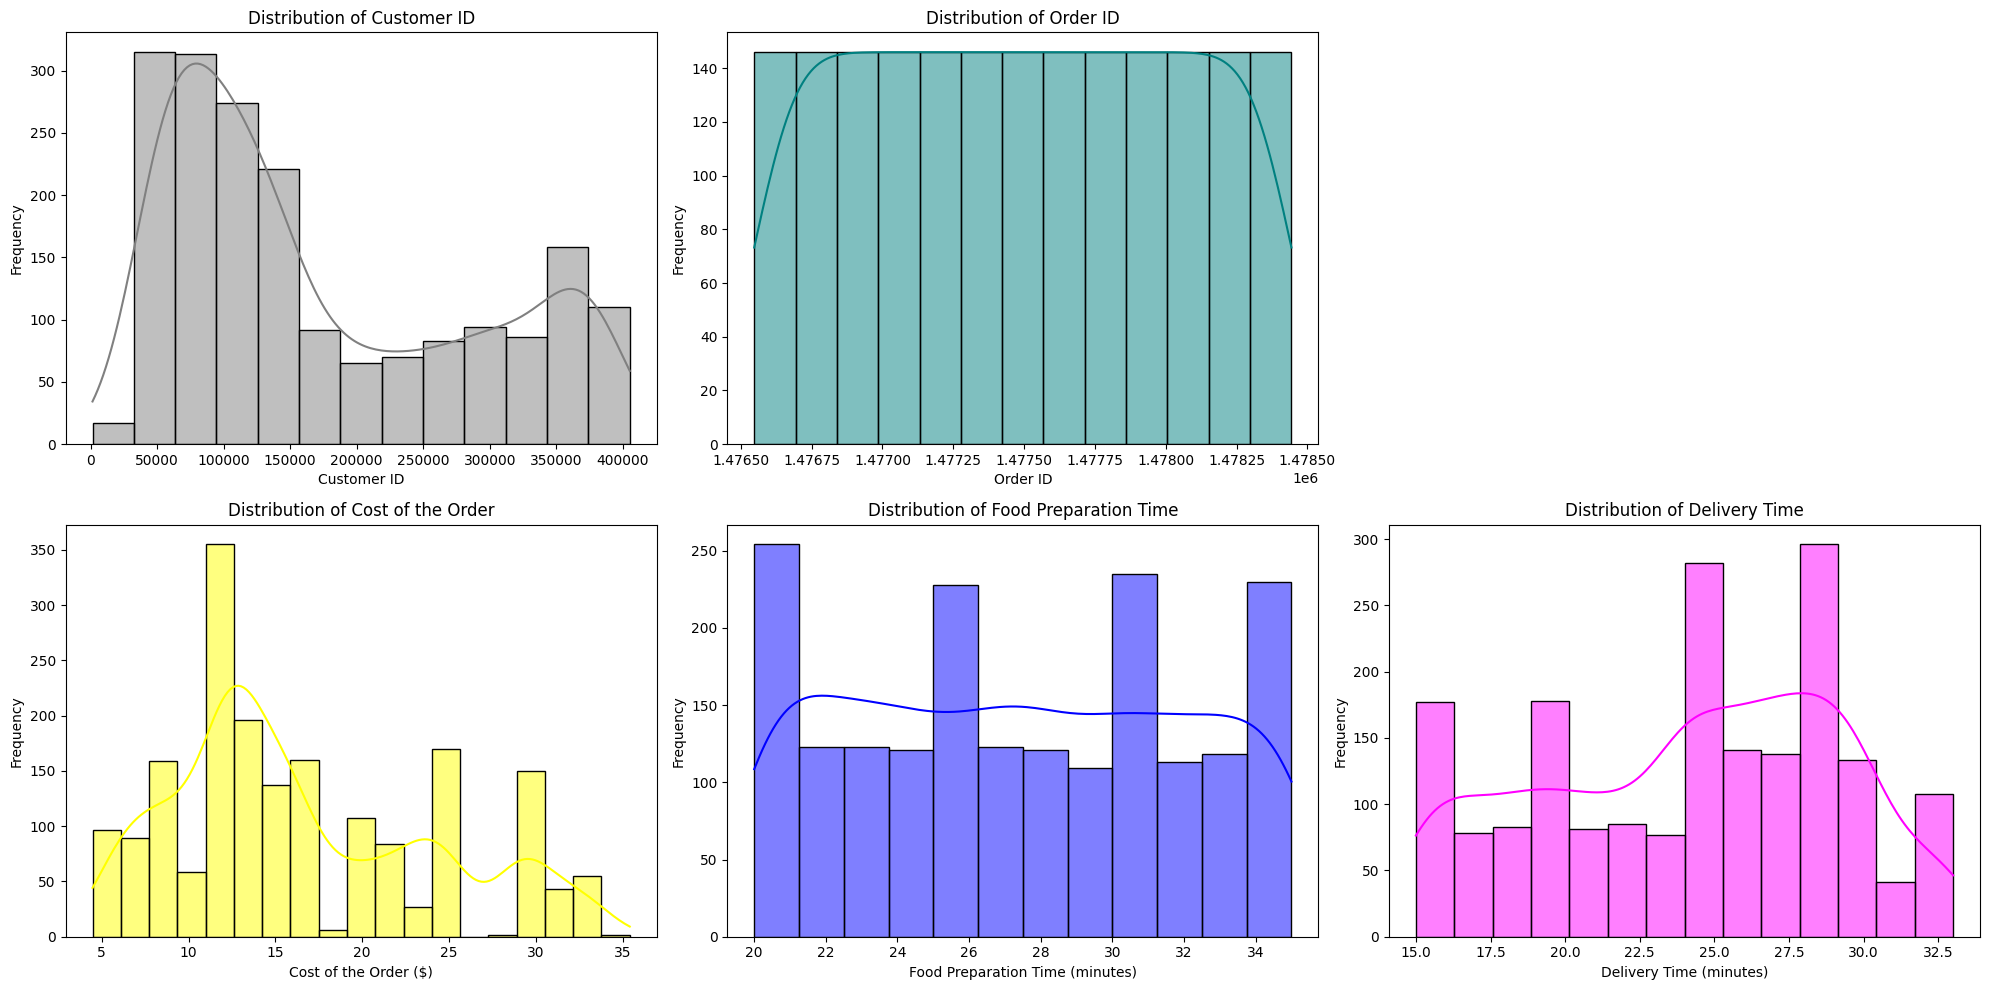

In [18]:
# Create histogram subplots for specified numerical data
# 'customer_id', 'order_id, 'cost_of_the_order', 'food_preparation_time, & 'delivery_time'.
# Subplots in order to view each side by side
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10));

# Plot customer id
sns.histplot(Original_df.customer_id, ax=axes[0, 0], kde=True, color='grey', edgecolor='black')
axes[0, 0].set_title('Distribution of Customer ID')
axes[0, 0].set_xlabel('Customer ID')
axes[0, 0].set_ylabel('Frequency')


# Plot order id
sns.histplot(Original_df.order_id, ax=axes[0, 1], kde=True, color='teal', edgecolor='black')
axes[0, 1].set_title('Distribution of Order ID')
axes[0, 1].set_xlabel('Order ID')
axes[0, 1].set_ylabel('Frequency')

# Plot cost of the order
sns.histplot(Original_df.cost_of_the_order, ax=axes[1,0], kde=True, color='yellow', edgecolor='black')
axes[1, 0].set_title('Distribution of Cost of the Order')
axes[1, 0].set_xlabel('Cost of the Order (\$)')
axes[1, 0].set_ylabel('Frequency')

# Plot food preparation time
sns.histplot(Original_df.food_preparation_time, ax=axes[1,1], kde=True, color='blue', edgecolor='black')
axes[1, 1].set_title('Distribution of Food Preparation Time')
axes[1, 1].set_xlabel('Food Preparation Time (minutes)')
axes[1, 1].set_ylabel('Frequency')

# Plot delivery time
sns.histplot(Original_df.delivery_time, ax=axes[1,2], kde=True, color='magenta', edgecolor='black')
axes[1, 2].set_title('Distribution of Delivery Time')
axes[1, 2].set_xlabel('Delivery Time (minutes)')
axes[1, 2].set_ylabel('Frequency')

# Remove empty subplot
fig.delaxes(axes[0, 2])
# Adjust layout
plt.tight_layout()
plt.show()

OBSERVATIONS - Histograms:
* Customer id: The distribution seems quite uniform, reflecting a varied customer base. However, the KDE curve reveals a non-uniform pattern with multiple peaks, indicating clusters of customer activity..

* Order id: The order id are distributed widely, indicating a consistent flow of orders over time. The KDE curve supports this, displaying a sharp peak that signifies a high concentration of orders within a specific 'order id' range.

* Cost of the order: The cost distribution is right-skewed. The KDE curve emphasizes this skewness, with a long tail towards higher costs, indicating fewer high-cost orders. The highest frequency of orders is in the \$10 to \$15 range, with smaller peaks around \$5 to \$10 and \$20 to \$25.   **INSIGHT: Focus on the popular price range of \$10 to \$15, and use this data to create targeted marketing campaigns for different price ranges to maximize sales.**

* Food preparation time: The food preparation times vary with a notciebale peak, suggesting a typical preparation duration. The KDE curve supports this, showing a single peak, suggesting consistent food preparation times.

* Delivery time: The delivery time also show variation, with a peak indicating the most common delivery duration. The KDE curve emphasizes this skewness, with a long tail towards longer delivery times, indicating occasional delays.

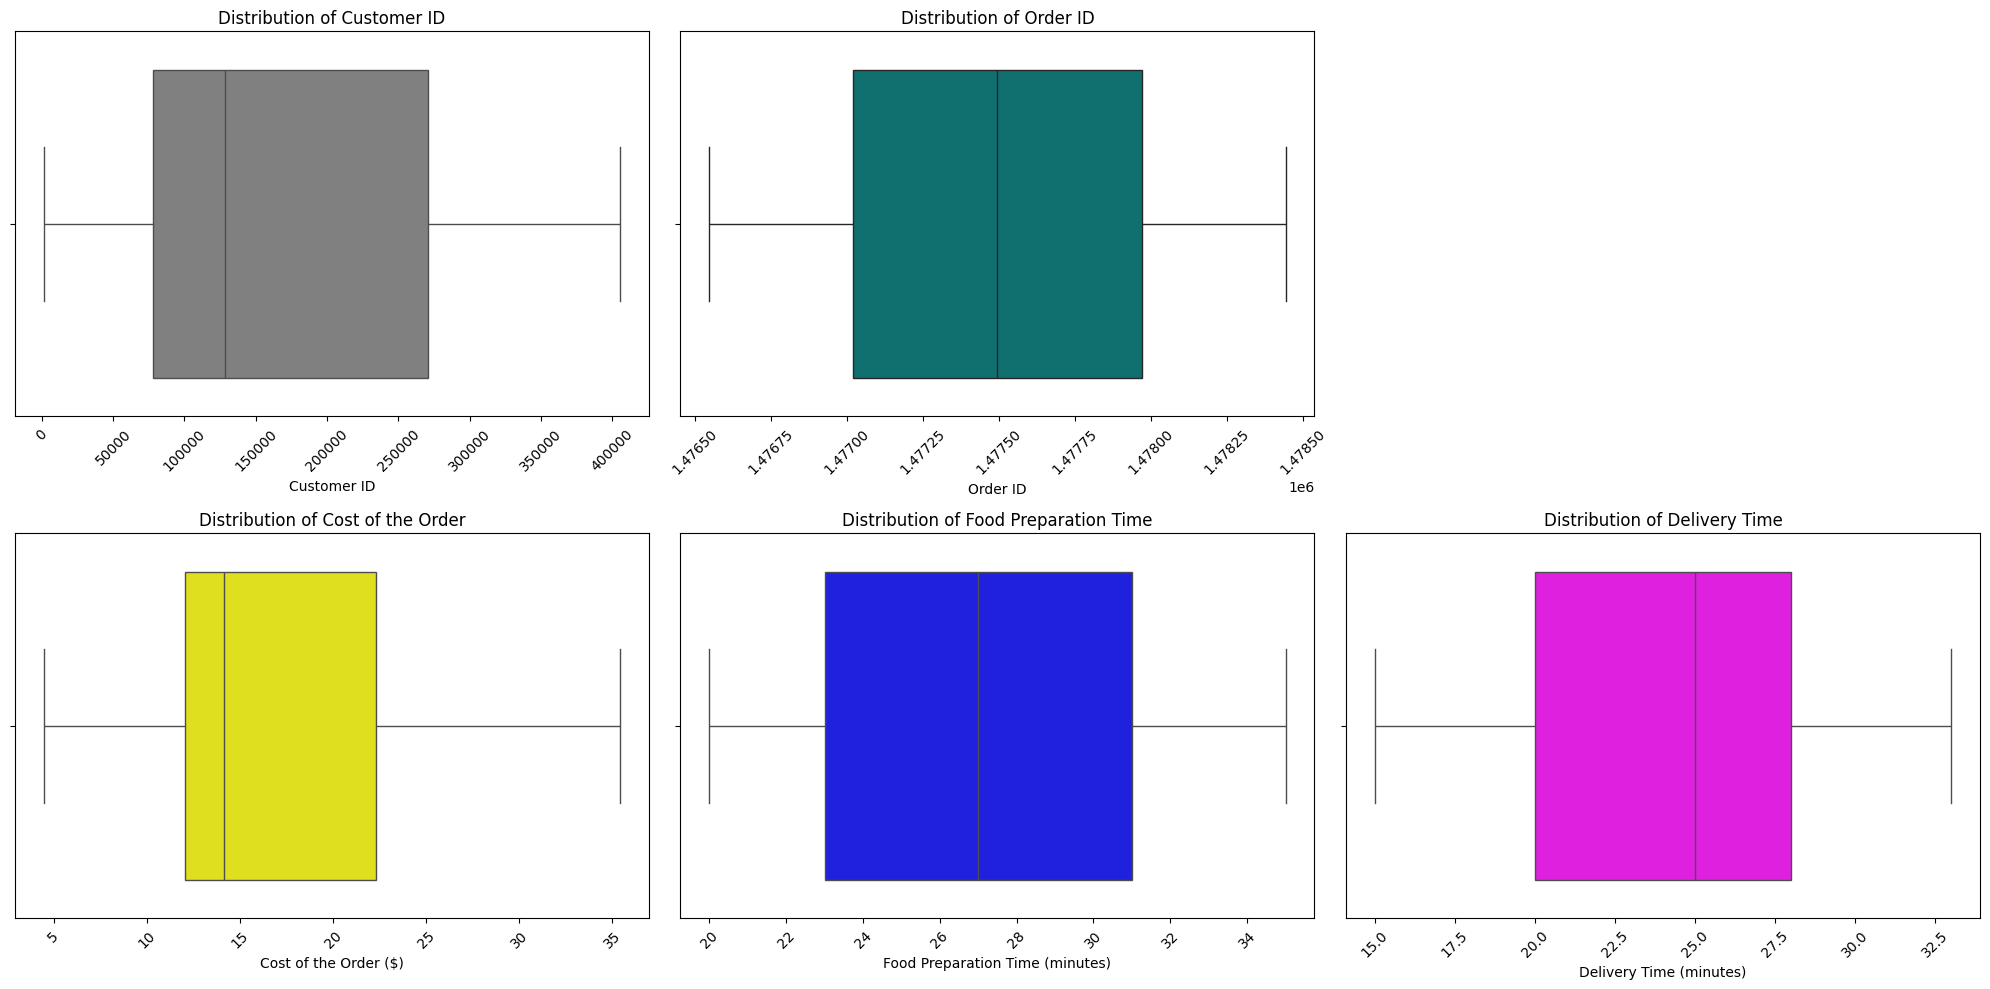

In [19]:
# Create boxplt subplots to summarize distribution central tendency, variability and identify potential outliers for specified numerical data
# Customer_id', 'order_id, 'cost_of_the_order', 'food_preparation_time, & 'delivery_time
# Subplots in order to view each side by side

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

# Plot each boxplot with specific colors
sns.boxplot(x=Original_df['customer_id'], ax=axes[0, 0], color='grey')
axes[0, 0].set_title('Distribution of Customer ID')
axes[0, 0].set_xlabel('Customer ID')

sns.boxplot(x=Original_df['order_id'], ax=axes[0, 1], color='teal')
axes[0, 1].set_title('Distribution of Order ID')
axes[0, 1].set_xlabel('Order ID')

sns.boxplot(x=Original_df['cost_of_the_order'], ax=axes[1, 0], color='yellow')
axes[1, 0].set_title('Distribution of Cost of the Order')
axes[1, 0].set_xlabel('Cost of the Order (\$)')

sns.boxplot(x=Original_df['food_preparation_time'], ax=axes[1, 1], color='blue')
axes[1, 1].set_title('Distribution of Food Preparation Time')
axes[1, 1].set_xlabel('Food Preparation Time (minutes)')

sns.boxplot(x=Original_df['delivery_time'], ax=axes[1, 2], color='magenta')
axes[1, 2].set_title('Distribution of Delivery Time')
axes[1, 2].set_xlabel('Delivery Time (minutes)')

# Remove the empty subplot
fig.delaxes(axes[0, 2])

# Rotate the x-axis labels to prevent overlap
for ax in axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

# Adjust layout
plt.tight_layout()
plt.show()

OBSERVATIONS - Boxplots:
* Customer  id distribution:
The median customer id is around the middle of the range.
The interquartile range (IQR) is relatively narrow, indicating low variability. No visible outliers, indicating a diverse customer base.

* Order id distribution:
The median order id is centered within the range.
The IQR is narrow, suggesting low variability. No visible outliers.

* Cost of the order:
The boxplot has several high-value outliers, indicating some orders are signifcantly more expensive than the majority. The median cost is around $20. The IQR shows moderate variability with positive skewedness. **INSIGHT: Optimize high cost orders by examining them to determine if they represent bulk purchases or premium products and consider targeted marketing for these segments.**

* Food preparation time: The distribution is relatively tight with a few outliers, suggesting most orders are prepared within a consistent timeframe, but some take longer. The median preparation time is around 10-15 minutes. The IQR indicates moderate variability.

* Delivery time: This also shows a tight distribution with suggested outliers, indicating most deliveries are timely, but some are delayed. The median delivery time is around 20 minutes. Variability: The IQR shows moderate variability.

In [20]:
 # Determine the number of unique customers in the dataset
total_customers = len(Original_df.customer_id.unique())
print('OBSERVATIONS:')
print(f'* There are {total_customers} unique customers in the dataset')
print('This means that some customer order more than once, being there are 1898 orders.')

OBSERVATIONS:
* There are 1200 unique customers in the dataset
This means that some customer order more than once, being there are 1898 orders.


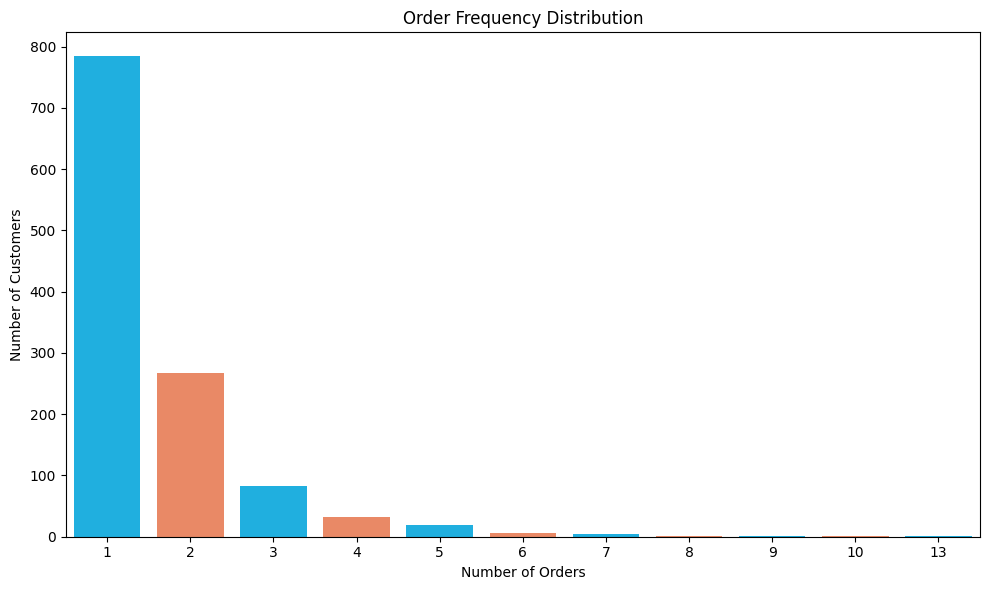

In [21]:
# Plot, order id frequency distribution

# Count the number of orders for each customer_id
order_counts = Original_df['customer_id'].value_counts()

# Create a frequency distribution of the number of orders
order_frequency = order_counts.value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=order_frequency.index, y=order_frequency.values, palette=['deepskyblue', 'coral'])

# Adding labels and title
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.title('Order Frequency Distribution')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

In [22]:
# Observations
print('OBSERVATIONS:')
print('* The histogram is right skewed distribution, indicating most customers place fewer orders.')
print('* There is a high frequency of single orders, the 1st bar being significantly higher, shows that over 700 customers made just 1 order.')
print('* Decreasing frequency, the number of customers decreases sharply as the number of orders increases.')
print('* Very few customers made more that 5 orders.')
print('INSIGHT:')
print('* This trend indicates that although there is substantial customer base, there are also opportunities to boost growth by promoting repeat orders.')

OBSERVATIONS:
* The histogram is right skewed distribution, indicating most customers place fewer orders.
* There is a high frequency of single orders, the 1st bar being significantly higher, shows that over 700 customers made just 1 order.
* Decreasing frequency, the number of customers decreases sharply as the number of orders increases.
* Very few customers made more that 5 orders.
INSIGHT:
* This trend indicates that although there is substantial customer base, there are also opportunities to boost growth by promoting repeat orders.


In [23]:
# Calculate number of customers who made only 1 order
len(order_counts[order_counts == 1])

784

In [24]:
# Calculate number of customer who made more than 1 order
len(order_counts[order_counts > 1])

416

In [25]:
# Calculate number of customers who made repeated orders
len(order_counts[order_counts > 2])

149

In [26]:
print('OBSERVATIONS:')
print('Total number of customers who made only 1 order are: 784, who made more than 1 order are: 416, who made repeated orders are: 146')

OBSERVATIONS:
Total number of customers who made only 1 order are: 784, who made more than 1 order are: 416, who made repeated orders are: 146


In [27]:
# Find the number of unique restuarants
num_restuarants = Original_df['restaurant_name'].nunique()
print('OBSERVATIONS:')
print(f'* There are {num_restuarants} unique restuarants in the dataset')


OBSERVATIONS:
* There are 178 unique restuarants in the dataset


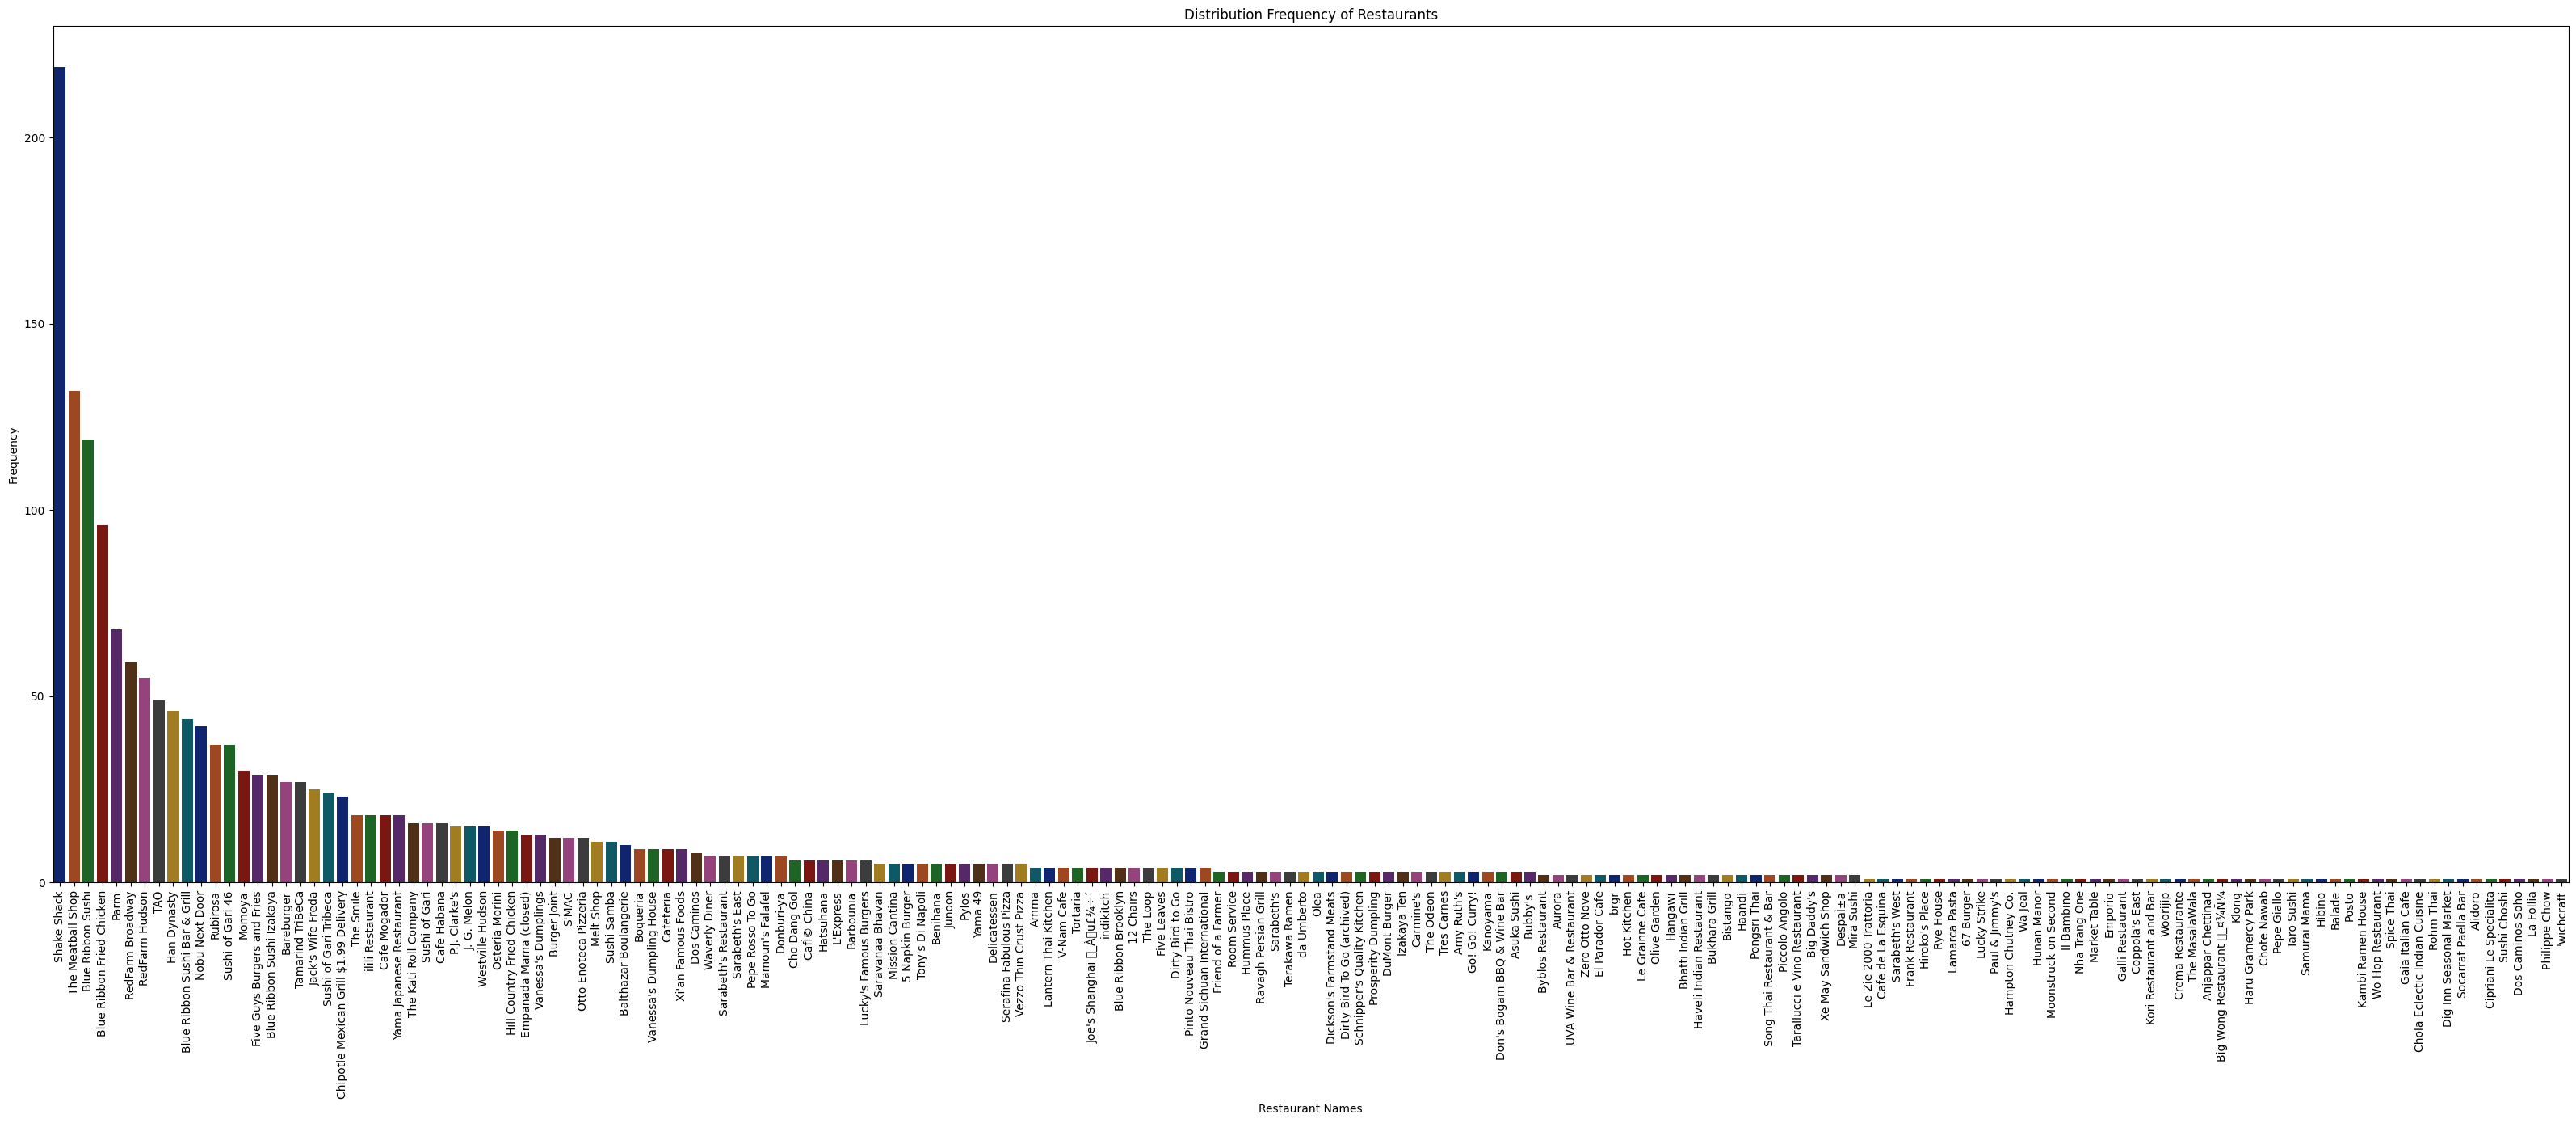

In [28]:
# Create restuarant barplot, categorical data.

# Calculate restuarant counts
restaurant_counts = Original_df['restaurant_name'].value_counts()

# Set the figure size to fit all restaurant names
plt.figure(figsize=(32, 14));
sns.barplot(x=restaurant_counts.index, y=restaurant_counts.values, palette='dark')

plt.title("Distribution Frequency of Restaurants")
plt.xlabel("Restaurant Names")
plt.ylabel("Frequency")

# Rotate x-axis labels to prevent overlap
plt.xticks(rotation=90)
# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Show plot
plt.show()

OBSERVATIONS:
* Restaurant Names: The graph shows a wide range of restaurant names with varying frequencies. Some names appear more frequently than others, indicitive by the height of the bar, indicating popular restaurants.**INSIGHT: This diversity suggests a competitive market with many players, which could be beneficial for customers seeking variety.**

In [29]:
# Find the number of unique cuisines
num_cuisines = Original_df['cuisine_type'].nunique()
print('OBSERVATIONS:')
print(f'* There are {num_cuisines} unique cuisines in the dataset')

OBSERVATIONS:
* There are 14 unique cuisines in the dataset


In [30]:
# View the types of cuisine the restuarants offer
list(Original_df.cuisine_type.unique())


['Korean',
 'Japanese',
 'Mexican',
 'American',
 'Indian',
 'Italian',
 'Mediterranean',
 'Chinese',
 'Middle Eastern',
 'Thai',
 'Southern',
 'French',
 'Spanish',
 'Vietnamese']

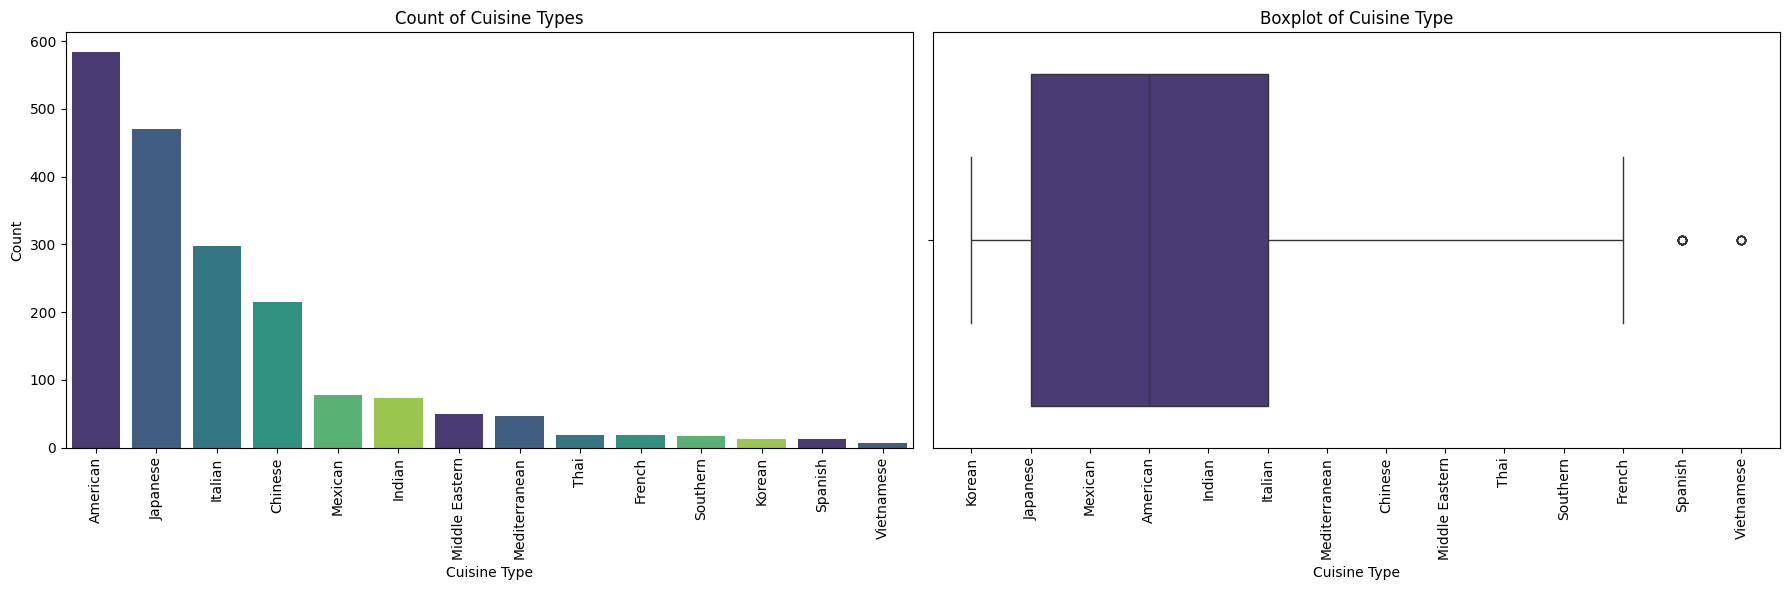

In [31]:
# Calculate and plot distribution of cuisine type, categorical data.
# Subplot barplot & boxplot of cuisine type distribution, in order to view each side by side.
# Define a consistent color palette
colors = sns.color_palette('viridis')

# Create a figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6));

# Calculate the frequency of each cuisine type
cuisine_frequency = Modified_df['cuisine_type'].value_counts().reset_index()

# Sort the data by order count for better visualization
cuisine_frequency = cuisine_frequency.sort_values(by='cuisine_type', ascending=False)

# Rename colums
cuisine_frequency.columns = ['cuisine_type', 'count']

# Plot barplot for cuisine_type
sns.countplot(ax=axes[0], data=Original_df, x='cuisine_type', palette=colors, order=cuisine_frequency['cuisine_type'])
axes[0].set_title('Count of Cuisine Types')
axes[0].set_xlabel('Cuisine Type')
axes[0].set_ylabel('Count')
# Rotate x-axis labels to prevent overlap
axes[0].tick_params(axis='x', rotation=90)

# Plot boxplot for cuisine_type
sns.boxplot(ax=axes[1], data=Original_df, x='cuisine_type', palette=colors)
axes[1].set_title('Boxplot of Cuisine Type')
axes[1].set_xlabel('Cuisine Type')
# Rotate x-axis labels to prevent overlap
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

OBSERVATIONS:
* Cuisine Types: The most common cuisine types include American, Japanese, Italian, Mexican, and Chinese.
* Mid sort after cusine are, Mexican, Indian, Middle Eastern, and Mediterranaen.
* Less common cuisine are Thai, French, Southern, Korean, (Spanish and Vietnamese, represented as outliers in the boxplot).

**INSIGHT:**
* **Popular cuisines dominate the market, while less frequent ones like Mediterranean and Spanish might represent niche markets with potential for growth.**

In [32]:
# Calculate the percentage of each rating
rating_percentages = Original_df['rating'].value_counts(normalize=True) * 100
rating_percentages


,rating
Not given,38.777661
5,30.979979
4,20.337197
3,9.905163


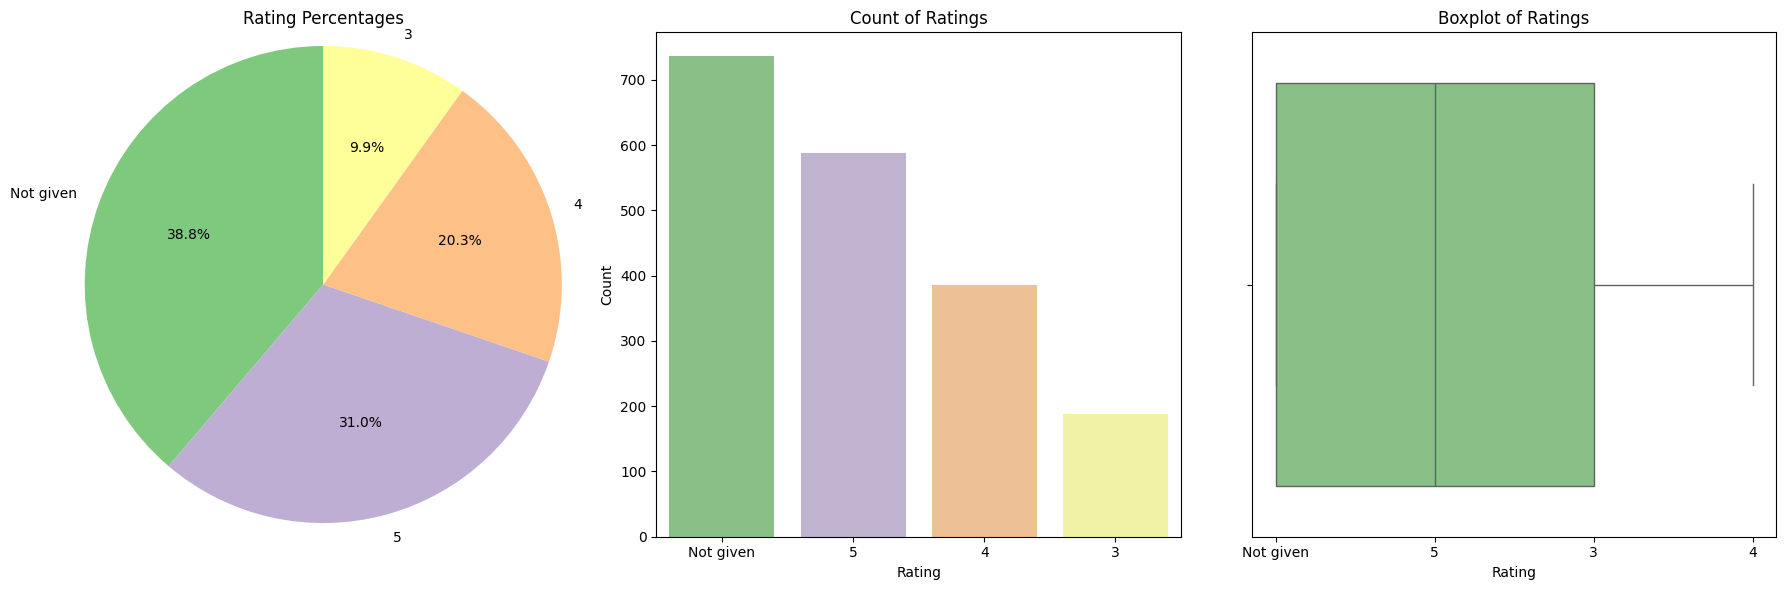

In [33]:
# Subplot, countplot, piechart & boxplot, rating distribution, in order to view each side by side.
# Define a consistent color palette
colors = sns.color_palette('Accent')

# Create a figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6));

# Plot pie chart for ratings
rating_percentages = Original_df['rating'].value_counts(normalize=True) * 100
axes[0].pie(rating_percentages, labels=rating_percentages.index, autopct='%1.1f%%', startangle=90, colors=colors)
axes[0].set_title('Rating Percentages')
 # Ensure pie is drawn as a circle
axes[0].axis('equal')

# Define the order of the ratings
rating_order = ['Not given', '5', '4', '3']

# Plot countplot for ratings
sns.countplot(ax=axes[1], data=Original_df, x='rating', palette=colors, order=rating_order)
axes[1].set_title('Count of Ratings')
axes[1].set_xlabel('Rating')
axes[1].set_ylabel('Count')

# Plot boxplot for ratings
sns.boxplot(ax=axes[2], data=Original_df, x='rating', palette=colors)
axes[2].set_title('Boxplot of Ratings')
axes[2].set_xlabel('Rating')

plt.tight_layout()
plt.show()

OBSERVATIONS:
* Percentage of customer ratings: 38.8% 'Not given', 31.0% rated '5'. 20.3% rated '4' and 9.9% rated '3'
* The pie chart shows most ratings are either not given, or are high (5), or with fewer lower ratings (3 and 4).
* The countplot confirms this, with the bar for rating ‘Not given’ being the tallest.
* The boxplot indicates that most ratings besides 'not given' are concentrated around ‘5’.

**INSIGHT:**
* **Both the pie chart and countplot include a category for ‘Not given’ ratings, which is significant and should be addressed in data analysis.**
* **The high frequency of ‘5’ ratings suggests a central tendency in the data, which could indicate average performance or satisfaction levels. Customers are more likely to give high ratings or leave no rating at all.**
* **The presence of ‘Not given’ ratings highlights potential gaps in data collection that may need to be investigated further.**

In [34]:
# Calculate the percentage of each day of the week
day_percentages = Original_df['day_of_the_week'].value_counts(normalize=True) * 100
day_percentages


,day_of_the_week
Weekend,71.18019
Weekday,28.81981


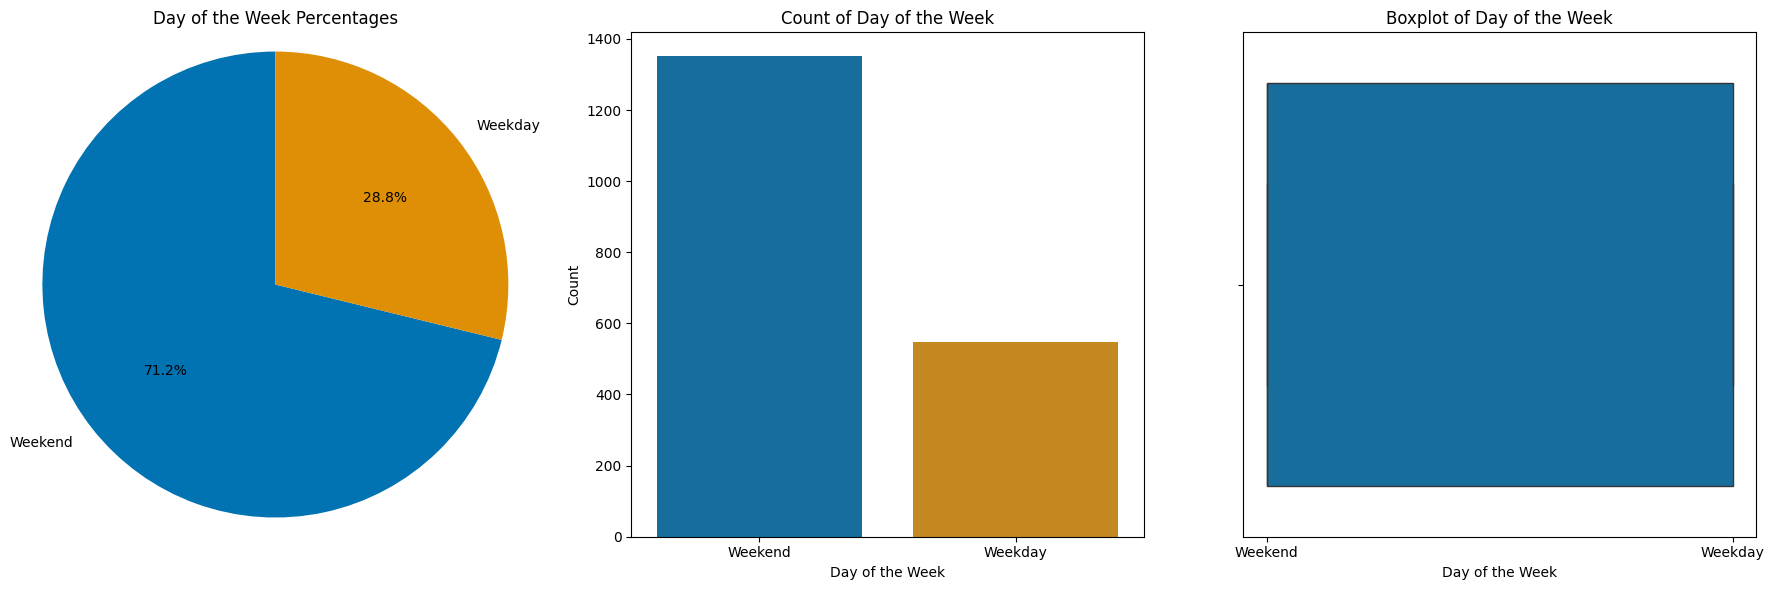

In [35]:
# Subplot, countplot, piechart & boxplot, day_of_the_week distribution, in order to view each side by side.
# Define a consistent color palette
colors = sns.color_palette('colorblind')

# Create a figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6));

# Plot pie chart for day_of_the_week
day_percentages = Original_df['day_of_the_week'].value_counts(normalize=True) * 100
axes[0].pie(day_percentages, labels=day_percentages.index, autopct='%1.1f%%', startangle=90, colors=colors)
axes[0].set_title('Day of the Week Percentages')
# Ensure pie is drawn as a circle
axes[0].axis('equal')

# Plot countplot for day_of_the_week
sns.countplot(ax=axes[1], data=Original_df, x='day_of_the_week', palette=colors)
axes[1].set_title('Count of Day of the Week')
axes[1].set_xlabel('Day of the Week')
axes[1].set_ylabel('Count')

# Plot boxplot for day_of_the_week
sns.boxplot(ax=axes[2], data=Original_df, x='day_of_the_week', palette=colors)
axes[2].set_title('Boxplot of Day of the Week')
axes[2].set_xlabel('Day of the Week')

plt.tight_layout()
plt.show()

OBSERVATION:
* The pie chart shows that ‘Weekend’ occupies a larger portion, indicating a higher percentage compared to ‘Weekday’.
* Percentage of Day of the Week orders: Weekend 71.2% and Weekdays 28.8%
* The countplot confirms this, with the ‘Weekend’ bar being significantly taller than the ‘Weekday’ bar.
* The boxplot does not display any data, which indicates a lack of variability in the ‘day_of_the_week’ data, being that it is very uniform (e.g., all entries are ‘Weekday’ or ‘Weekend’), so it will not show any meaningful variation.

**INSIGHT:**
* **The graphs indicate that orders are more frequent on weekends.**

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [36]:
# Calculate the number of orders for each restuarant
restuarant_order_counts = Original_df.groupby('restaurant_name')['order_id'].count().reset_index()

# Sort the restuarants by number of orders in descending order
sorted_restuarant_order_counts = restuarant_order_counts.sort_values(by='order_id', ascending=False)

# Select the top 5 restuarants
top_5_restuarants = sorted_restuarant_order_counts.head(5)

print('OBSERVATIONS:')
print('* Top 5 restuarants in terms of the number of orders received with respective order_id:')
print(top_5_restuarants)

OBSERVATIONS:
* Top 5 restuarants in terms of the number of orders received with respective order_id:
               restaurant_name  order_id
136                Shake Shack       219
153          The Meatball Shop       132
21           Blue Ribbon Sushi       119
20   Blue Ribbon Fried Chicken        96
109                       Parm        68


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [37]:
# Calculate the most poplular cuisine on weekends
# Filter the data for weekends
Original_df[Original_df['day_of_the_week'] == 'Weekend']['cuisine_type'].value_counts().head(5)

,cuisine_type
American,415
Japanese,335
Italian,207
Chinese,163
Mexican,53


In [38]:
print('OBSERVATIONS:')
print('The most popular cuisine on weekends are:')
print('American (415)', 'Japanese (335)', 'Italian (207)', 'Chinese (163)', 'Mexican (53)')
print('Topping the list is: American.')

OBSERVATIONS:
The most popular cuisine on weekends are:
American (415) Japanese (335) Italian (207) Chinese (163) Mexican (53)
Topping the list is: American.


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [39]:
# Find the percentage of orders costing more than 20 dollars
round(len(Original_df[Original_df.cost_of_the_order>20])/len(Original_df)*100,2)

29.24

In [40]:
print('OBSERVATIONS:')
print('* The percentage of orders costing more than 20 dollars is 29.24%')

OBSERVATIONS:
* The percentage of orders costing more than 20 dollars is 29.24%


### **Question 10**: What is the mean order delivery time? [1 mark]

In [41]:
# Find mean order delivery time
round(Original_df.delivery_time.mean(),2)

24.16

In [42]:
print('OBSERVATIONS:')
print('* The mean order delivery time is 24.16 minutes')
print('* This mean order delivery time seems satisfactory, likely to result in higher customer satisfaction, thus higher rating.')

OBSERVATIONS:
* The mean order delivery time is 24.16 minutes
* This mean order delivery time seems satisfactory, likely to result in higher customer satisfaction, thus higher rating.


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [43]:
# Group by customer id and count the number of orders for each customer
customer_order_counts = Modified_df['customer_id'].value_counts().reset_index()

# Rename the columns
customer_order_counts.columns = ['customer_id', 'number_of_orders']

# Get the top 3 most frequent customers
top_customers = customer_order_counts.head(3)

print('OBSERVATIONS:')
print("Top 3 most frequent customers and the number of orders they placed:")
print(top_customers)

OBSERVATIONS:
Top 3 most frequent customers and the number of orders they placed:
   customer_id  number_of_orders
0        52832                13
1        47440                10
2        83287                 9


### Bivariate/Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


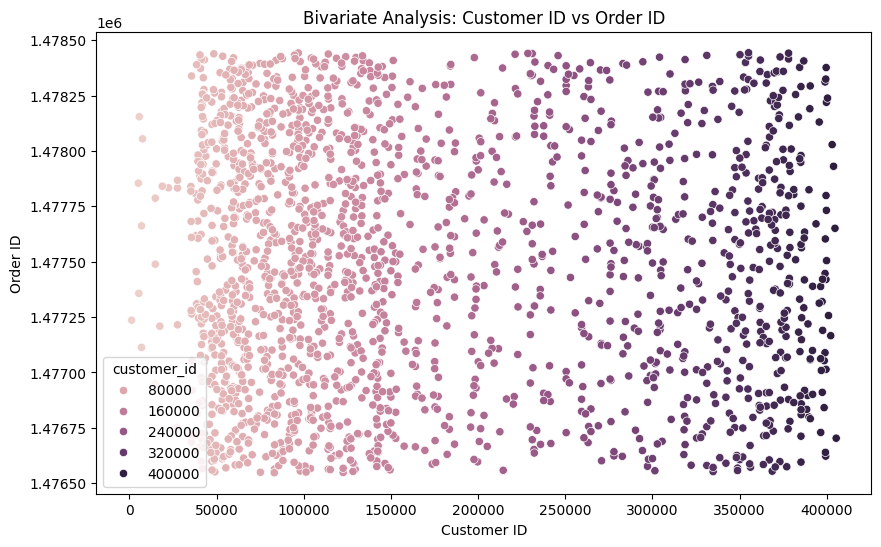

In [44]:
# Scatterplot bivariate analysis between customer_id & order_id
plt.figure(figsize=(10, 6))
sns.scatterplot(x='customer_id', y='order_id', data=Original_df, hue= 'customer_id')
plt.title('Bivariate Analysis: Customer ID vs Order ID')
plt.xlabel('Customer ID')
plt.ylabel('Order ID')
plt.show()

In [45]:
# Observations
print('OBSERVATIONS:')
print('* The scatter plot shows a dense association of customer_id and order_id, with no clear pattern or trend.')
print('INSIGHT:')
print('* Further analysis can be done to check for any correlation.')


OBSERVATIONS:
* The scatter plot shows a dense association of customer_id and order_id, with no clear pattern or trend.
INSIGHT:
* Further analysis can be done to check for any correlation.


      cuisine_type  unique_customer_count  unique_order_count
0         American                    417                 584
1          Chinese                    162                 215
2           French                     13                  18
3           Indian                     54                  73
4          Italian                    233                 298
5         Japanese                    304                 470
6           Korean                     11                  13
7    Mediterranean                     37                  46
8          Mexican                     63                  77
9   Middle Eastern                     37                  49
10        Southern                     12                  17
11         Spanish                      8                  12
12            Thai                     15                  19
13      Vietnamese                      5                   7


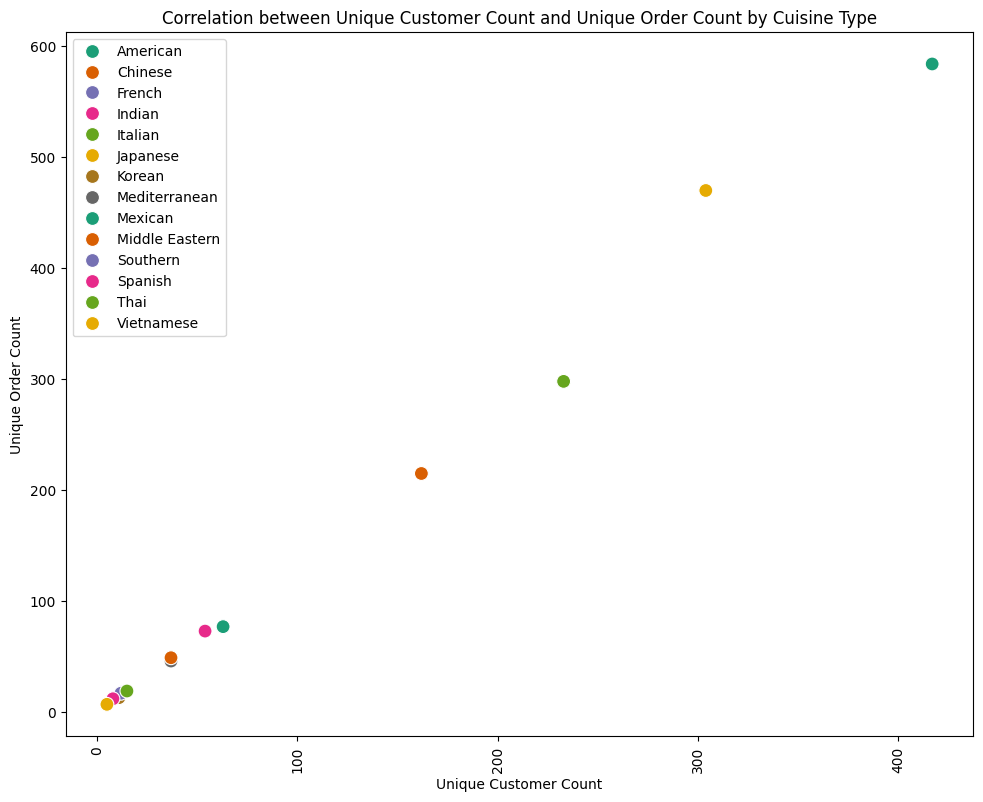

In [46]:
# Multivariate analysis for Cuisine count, Unique customer count and Unique order count

# Group by cuisine type  and count unique customer id and order id
cuisine_summary = Modified_df.groupby('cuisine_type').agg({'customer_id': 'nunique', 'order_id': 'nunique'})

# Rename colums
cuisine_summary.columns = ['unique_customer_count', 'unique_order_count']

# Reset index
cuisine_summary = cuisine_summary.reset_index()
print(cuisine_summary)

# Create a scatter plot
plt.figure(figsize=(12, 8));
sns.scatterplot(data=cuisine_summary, x='unique_customer_count', y='unique_order_count', hue='cuisine_type', palette='Dark2', s=100)

# Add labels and title
plt.xlabel('Unique Customer Count')
plt.ylabel('Unique Order Count')
plt.title('Correlation between Unique Customer Count and Unique Order Count by Cuisine Type')
plt.legend(title='Cuisine Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.xticks(rotation=90)
plt.legend()
# Show plot
plt.show()


In [47]:
print('OBSERVATIONS:')
print('* There is a positive correlation between unique customer count and unique order count across different cuisine types.')
print('* American, Italian, and Indian cuisines have higher counts, indicating their popularity.')
print('* Cuisines like Mediterranean and French have lower counts, suggesting niche markets.')
print('INSIGHT:')
print('* Focus on popular cuisines; Analyze less popular cuisines.')
print('* Implement loyalty programs/special offers to encourage repeat orders from existing customers, especially cuisines with high unique order counts.*')

OBSERVATIONS:
* There is a positive correlation between unique customer count and unique order count across different cuisine types.
* American, Italian, and Indian cuisines have higher counts, indicating their popularity.
* Cuisines like Mediterranean and French have lower counts, suggesting niche markets.
INSIGHT:
* Focus on popular cuisines; Analyze less popular cuisines.
* Implement loyalty programs/special offers to encourage repeat orders from existing customers, especially cuisines with high unique order counts.*


In [48]:
# Calculate average cost of orders for each cuisine type
average_cost = Original_df.groupby('cuisine_type')['cost_of_the_order'].mean().reset_index()

# Sort the results by average cost
average_cost.columns = ['cuisine_type', 'cost_of_the_order']
print(average_cost)

      cuisine_type  cost_of_the_order
0         American          16.319829
1          Chinese          16.305209
2           French          19.793889
3           Indian          16.919726
4          Italian          16.418691
5         Japanese          16.304532
6           Korean          14.001538
7    Mediterranean          15.474783
8          Mexican          16.933117
9   Middle Eastern          18.820612
10        Southern          19.300588
11         Spanish          18.994167
12            Thai          19.207895
13      Vietnamese          12.882857


OBSERVATIONS:
* The cost of orders varies across different cuisine types, from \$12.88 (Vietnamese) to \$19.79 (French).

* French, Southern and Spanish cuisines have higher average costs, all above \$18 .

* Vietnamese, Korean and Mediterranean cuisines have lower average order costs, below \$16 .

**INSIGHT:**
* **Consider adjusting pricing strategies based on the cost distribution, promoting lower-cost cuisines could attract cost-sensitive customers.**

* **Conduct further analysis to understand customer preferences and spending patterns for different cuisines, this can inform targeted marketing campaigns and promotions.**

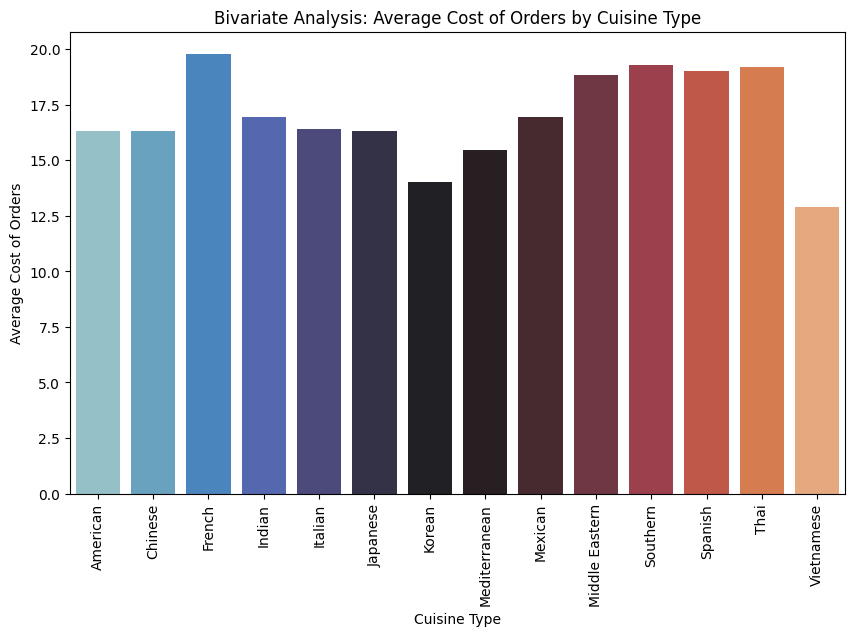

In [49]:
# Bivariate analysis for average costs of orders per cuisine type
# Create bargraph
plt.figure(figsize=(10, 6));
sns.barplot(x='cuisine_type', y='cost_of_the_order', data=average_cost, palette='icefire')
plt.title('Bivariate Analysis: Average Cost of Orders by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Average Cost of Orders')
plt.xticks(rotation=90)
plt.show()

OBSERVATIONS:
* French cuisine has the highest average order cost, almost \$20.
* Mid-range costs cuisines are American, Chinese & Italian.
* Vietnamese has the lowest average cost, \$12.

**INSIGHT:**
* **Investigate ways to reduce costs for higher priced cuisines without compromising quality to attract more cost-sensitive customers.**
* **Offer promotions/discounts on mid-range cost cuisines to boost sales and attract a broader customer base.**

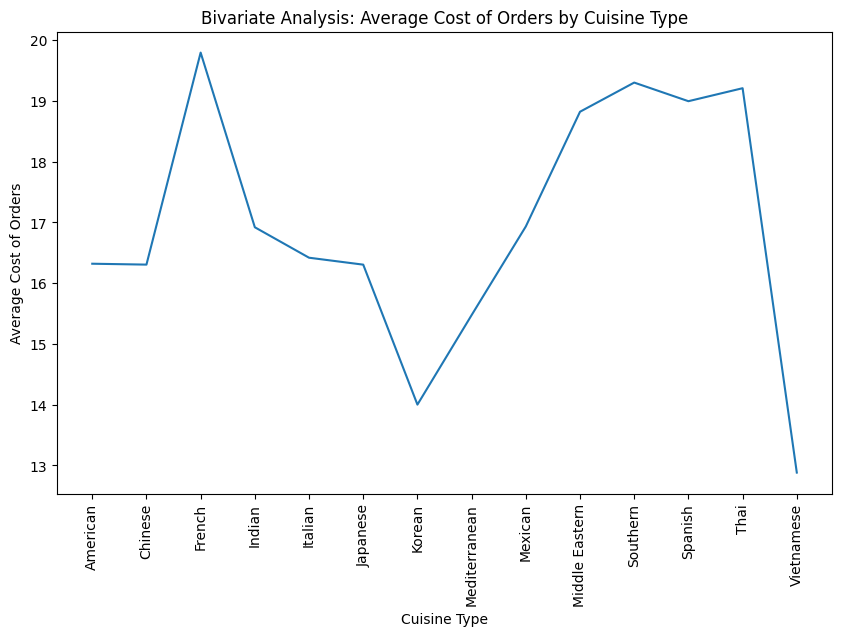

In [50]:
# Bivariate analysis for average cost of orders by cuisine type
# Create Lineplot
plt.figure(figsize=(10, 6));
sns.lineplot(x='cuisine_type', y='cost_of_the_order', data=average_cost)
plt.title('Bivariate Analysis: Average Cost of Orders by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Average Cost of Orders')
plt.xticks(rotation=90)
plt.show()

OBSERVATIONS:
* This lineplot further corraborates above bargraph distribution analysis of average cost of orders by cuisine type.

**INSIGHT:**
* **The graph provides a visual representation of how the average cost or orders varies across different cuisine types, this is very useful for analyzing pricing strategies and consumer spending habits.**


In [51]:
# Calculate the average ratings by cuisine type
# Convert 'rating' column to numeric, handling errors
Modified_df['rating'] = pd.to_numeric(Modified_df['rating'], errors='coerce')

# Calculate the average rating for each restuarant
average_ratings = Modified_df.groupby('cuisine_type')['rating'].mean().reset_index()

# Rename the columns
average_ratings.columns = ['cuisine_type', 'average_ratings']
print(average_ratings)

# Calculate the mean average rating
mean_average_ratings = average_ratings['average_ratings'].mean()

print(mean_average_ratings)

      cuisine_type  average_ratings
0         American         4.298913
1          Chinese         4.338346
2           French         4.300000
3           Indian         4.540000
4          Italian         4.360465
5         Japanese         4.373626
6           Korean         4.111111
7    Mediterranean         4.218750
8          Mexican         4.416667
9   Middle Eastern         4.235294
10        Southern         4.307692
11         Spanish         4.833333
12            Thai         4.666667
13      Vietnamese         4.000000
4.35720461436875


In [52]:
print('OBSERVATIONS:')
print('* The Total Mean Average rating for all cuisines is approximately 4.4')

print('* 14 Total cuisine types, with an average rating ranging from 4.0 to 4.8')

OBSERVATIONS:
* The Total Mean Average rating for all cuisines is approximately 4.4
* 14 Total cuisine types, with an average rating ranging from 4.0 to 4.8


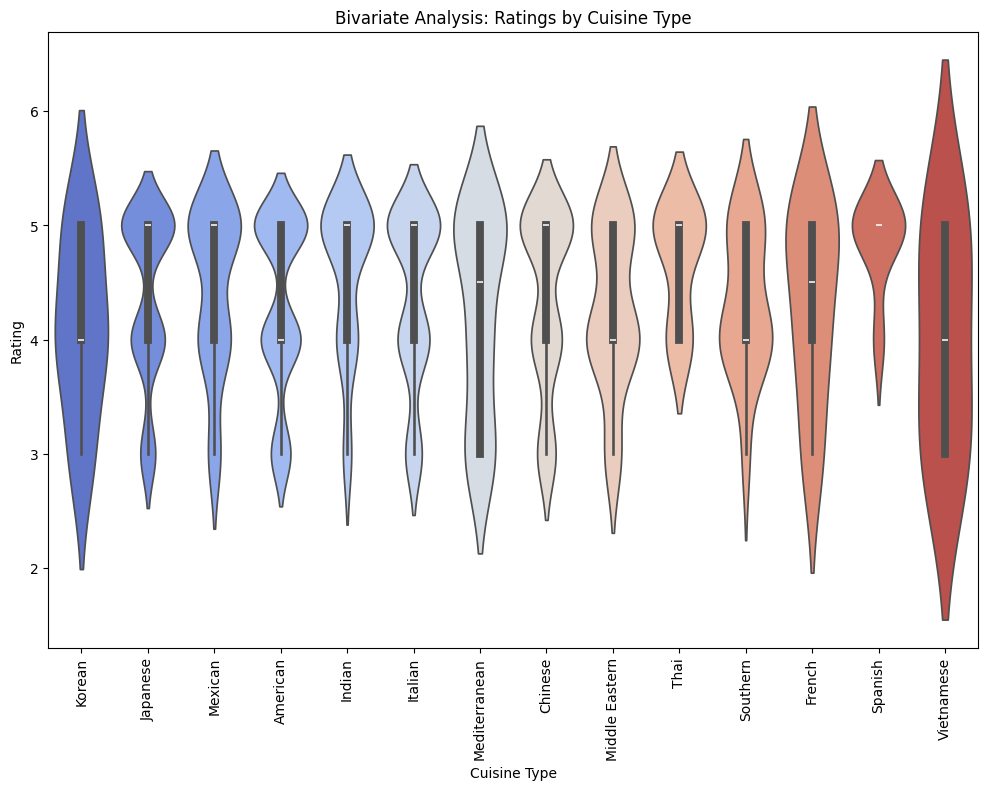

In [53]:
# Plot bivariate analysis of ratings by cuisine type
# Create Voilinplot
plt.figure(figsize=(12, 8));
sns.violinplot(x='cuisine_type', y='rating', data=Modified_df, palette='coolwarm')
plt.title('Bivariate Analysis: Ratings by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Rating')
plt.xticks(rotation=90)
plt.show()


OBSERVATIONS:
* Korean and Japanese: Narrow distribution around higher ratings, indicating consistent customer satisfaction.
* American: Wider distribution with a slight skew towards lower ratings, suggesting varied customer experiences.
* Italian and Spanish: Slight skew towards higher ratings but with some spread, indicating generally positive feedback with some variability.
* Mediterranean and Mexican: Broad distribution with multiple peaks, suggesting mixed customer experiences.
* French: Narrow peak around higher ratings, indicating high satisfaction but fewer lower ratings.
* Middle Eastern: Almost uniform distribution across all rating levels, indicating diverse customer opinions.
* Thai and Vietnamese: Wide base with concentrations at both ends, indicating polarized opinions.
* Chinese: Two peaks, suggesting distinct groups of customer satisfaction levels.
* Southern: Elongated shape with most data points in the middle range, indicating average satisfaction.

**INSIGHT:**
* **Distribution ratings ranging from 1 to 5 for various cusine types, helps to understand customer satisfaction and preferences for the different cuisines.**
* **Maintain Quality: For cuisines like Korean and Japanese, continue maintaining high standards and explore subtle innovations.**
* **Improve Consistency: For American cuisine, identify and address factors contributing to lower ratings.**
* **Targeted Improvements: For Mediterranean and Mexican cuisines, analyze specific dishes or aspects receiving varied feedback for targeted improvements.**
* **Expand Offerings: For French cuisine, maintain excellence while possibly expanding offerings to attract more customers.**
* **Understand Preferences: For Thai and Vietnamese cuisines, gather detailed feedback for improvemtn in quality or service.**



      cuisine_type  variance_ratings  std_deviation_ratings
0         American          0.558909               0.747602
1          Chinese          0.589200               0.767594
2           French          0.677778               0.823273
3           Indian          0.457551               0.676425
4          Italian          0.559364               0.747906
5         Japanese          0.529008               0.727329
6           Korean          0.611111               0.781736
7    Mediterranean          0.757056               0.870090
8          Mexican          0.503546               0.709610
9   Middle Eastern          0.488414               0.698866
10        Southern          0.397436               0.630425
11         Spanish          0.166667               0.408248
12            Thai          0.250000               0.500000
13      Vietnamese          1.000000               1.000000


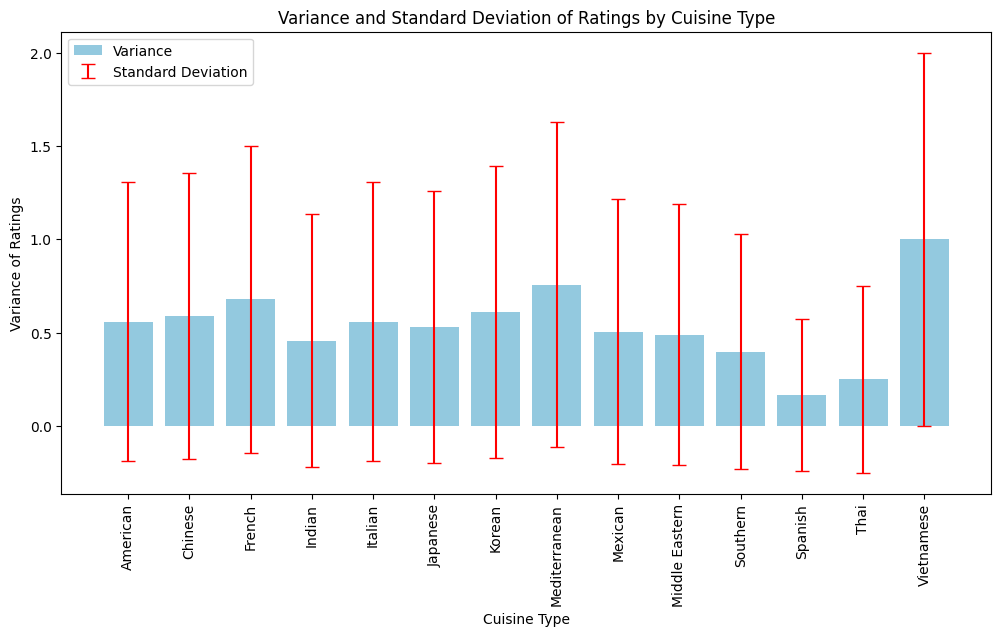

In [54]:
# Variance and Standard Deviation Bivariate analysis of Ratings by Cuisine Type
# Calculate variance of ratings per cusinne type
variance_ratings = Modified_df.groupby('cuisine_type')['rating'].var().reset_index()

# Calculate standard deviation of ratings per cusine type
std_deviation_ratings = Modified_df.groupby('cuisine_type')['rating'].std().reset_index()

# Rename columns
variance_ratings.columns = ['cuisine_type', 'variance_ratings']

std_deviation_ratings.columns = ['cuisine_type', 'std_deviation_ratings']

ratings_variance_std = pd.merge(variance_ratings, std_deviation_ratings, on='cuisine_type')
print(ratings_variance_std)

# Create the bar plot with error bars
plt.figure(figsize=(12, 6));
sns.barplot(x='cuisine_type', y='variance_ratings', data=ratings_variance_std, capsize=0.2, color='skyblue', label='Variance')
plt.errorbar(x=ratings_variance_std['cuisine_type'], y=ratings_variance_std['variance_ratings'], yerr=ratings_variance_std['std_deviation_ratings'], fmt='none', c='red', capsize=5, label='Standard Deviation')

# Add labels and title
plt.xlabel('Cuisine Type')
plt.ylabel('Variance of Ratings')
plt.title('Variance and Standard Deviation of Ratings by Cuisine Type')
plt.xticks(rotation=90)
plt.legend()

# Show the plot
plt.show()

OBSERVATIONS:
* HIGH variability - Vietnamese cuisine has the highest variance (1.000000) and standard deviation (1.000000), indicating that ratings for Vietnamese cuisine are highly spread out and vary significantly, followed by Mediterranean cuisine.

* MODERATE variability - American, Italian, Japanese & Chinese have moderate variance and standard deviation values, indicating a balanced spread of ratings.

* LOW variability - Thai & Spanish cuisines have the lowest variance and standard deviation, suggesting that ratings are more consistent and clustered around the mean.

**INSIGHT:**
* **Cusines with low variability suggest a  more uniform perception among raters, which could imply a more standardized experience or personal preferences. Therefore, maintaining consistency in quality and experience could be the key to sustaining customer satisfaction.**

* **Cuisines with high variability might indicate diverse opinions among raters, possibly due to their locations  differences in preparation or personal preferences. Therefore, further investigation into the factors contributing to this spread could be beneficial, such as examining specific dishes, restuarant quality, location.**

In [55]:
# Bivariate analysis for average food preparation time by cuisine
# Calculate the average preparation time by cuisine type
avg_preparation_time = Modified_df.groupby('cuisine_type')['food_preparation_time'].mean().reset_index()

# Sort average food preparation time for each cuisine type
avg_preparation_time = avg_preparation_time.sort_values(by='food_preparation_time', ascending=False)

# Rename columns
avg_preparation_time.columns = ['cuisine_type', 'average_preparation_time']
print(avg_preparation_time)


      cuisine_type  average_preparation_time
10        Southern                 27.588235
1          Chinese                 27.511628
5         Japanese                 27.510638
4          Italian                 27.483221
0         American                 27.440068
12            Thai                 27.315789
3           Indian                 27.109589
7    Mediterranean                 27.000000
11         Spanish                 26.916667
2           French                 26.888889
8          Mexican                 26.727273
9   Middle Eastern                 26.673469
13      Vietnamese                 25.714286
6           Korean                 25.461538


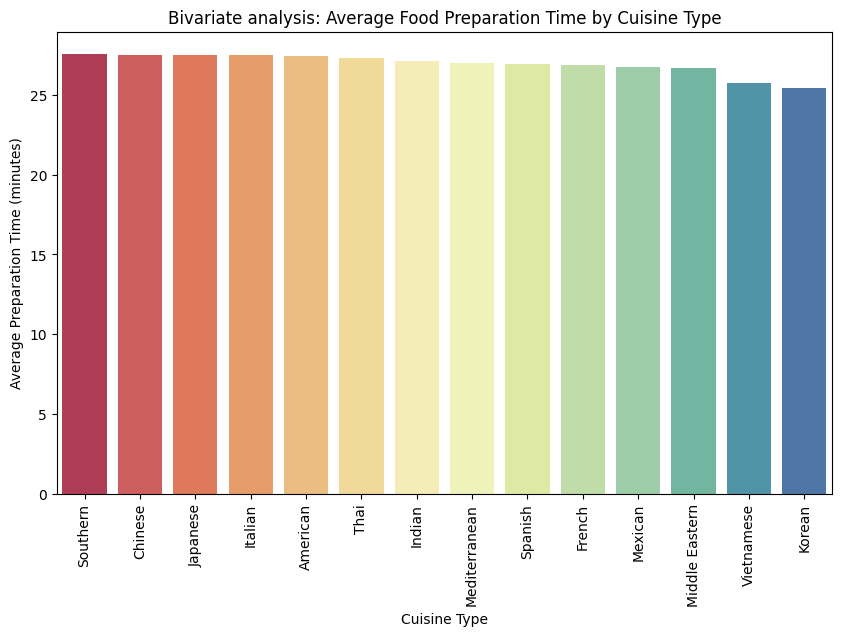

In [56]:
# Create Barplot for average food preparation time by cuisine type
plt.figure(figsize=(10,6));
sns.barplot(x='cuisine_type', y='average_preparation_time', data=avg_preparation_time, palette= 'Spectral')
# Add labels and title
plt.title('Bivariate analysis: Average Food Preparation Time by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Average Preparation Time (minutes)')
plt.xticks(rotation=90)
plt.show()

OBSERVATIONS:
* Shortest average food preparation time, Korean cuisine at 25.46 minutes.
* Longest average food preparation time, Southern cuisine at 27.59 minutes.
* The average food preparation time for all cuisines is relatively close, 25.46 to 27.59 minutes.

**INSIGHT:**
* **For cuisines with longer preparation times, like Southern, they should consider investing in training and efficient cooking techiques to reduce preparation time without compromising quality.**
* **For restuarants aiming to improve service speed, focusing on cuisines with shorter preparation times like Korean, could be beneficial.**

In [57]:
# Multivariate Analysis between 'rating', 'delivery_time', & day_of_the_week'

# Converting 'rating' to numeric, as it shows some values as 'Not given'
Modified_df['rating'] = pd.to_numeric(Modified_df['rating'], errors='coerce')
print(Modified_df['rating'].unique())

# Create a numerical representaion of 'day_of_the_week' from dataset given
day_mapping = {'Weekday': 0, 'Weekend': 1}
Modified_df['day_numeric'] = Modified_df['day_of_the_week'].map(day_mapping)

print(Modified_df['day_numeric'].unique())


[nan  5.  3.  4.]
[1 0]


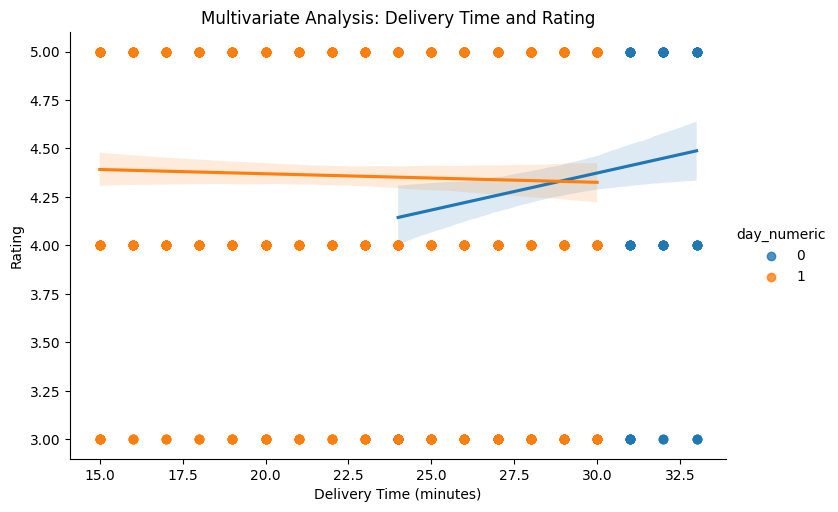

In [58]:
# Plot Multivariate analysis between 'rating', 'delivery_time' & 'days_of_the_week'
# Lmplot, show linear regression lines
sns.lmplot(x='delivery_time', y='rating', data=Modified_df, hue='day_numeric', aspect=1.5)
plt.title('Multivariate Analysis: Delivery Time and Rating')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Rating')
plt.show()

OBSERVATIONS:
* Higher ratings (4 & 5) are associated with both day type (weekday 'day_numeric=0' and weekend 'day_numeric=1'
* Delivery times are generally spread between 15 to 33 miuntes, with a noticebale concentration around 24-30 minutes.
* Weekdays upward trend indicates that shorter delivery times might correlate with higher ratings.**
* Weekend relatively flat, with a slight downward trend, indicates that delivery time has less impact on ratings.

**INSIGHT:**
* **To improve customer satisfaction, prioritize reducing delivery times on weekends, as customers appear to be more sensitive to delays during this time.**

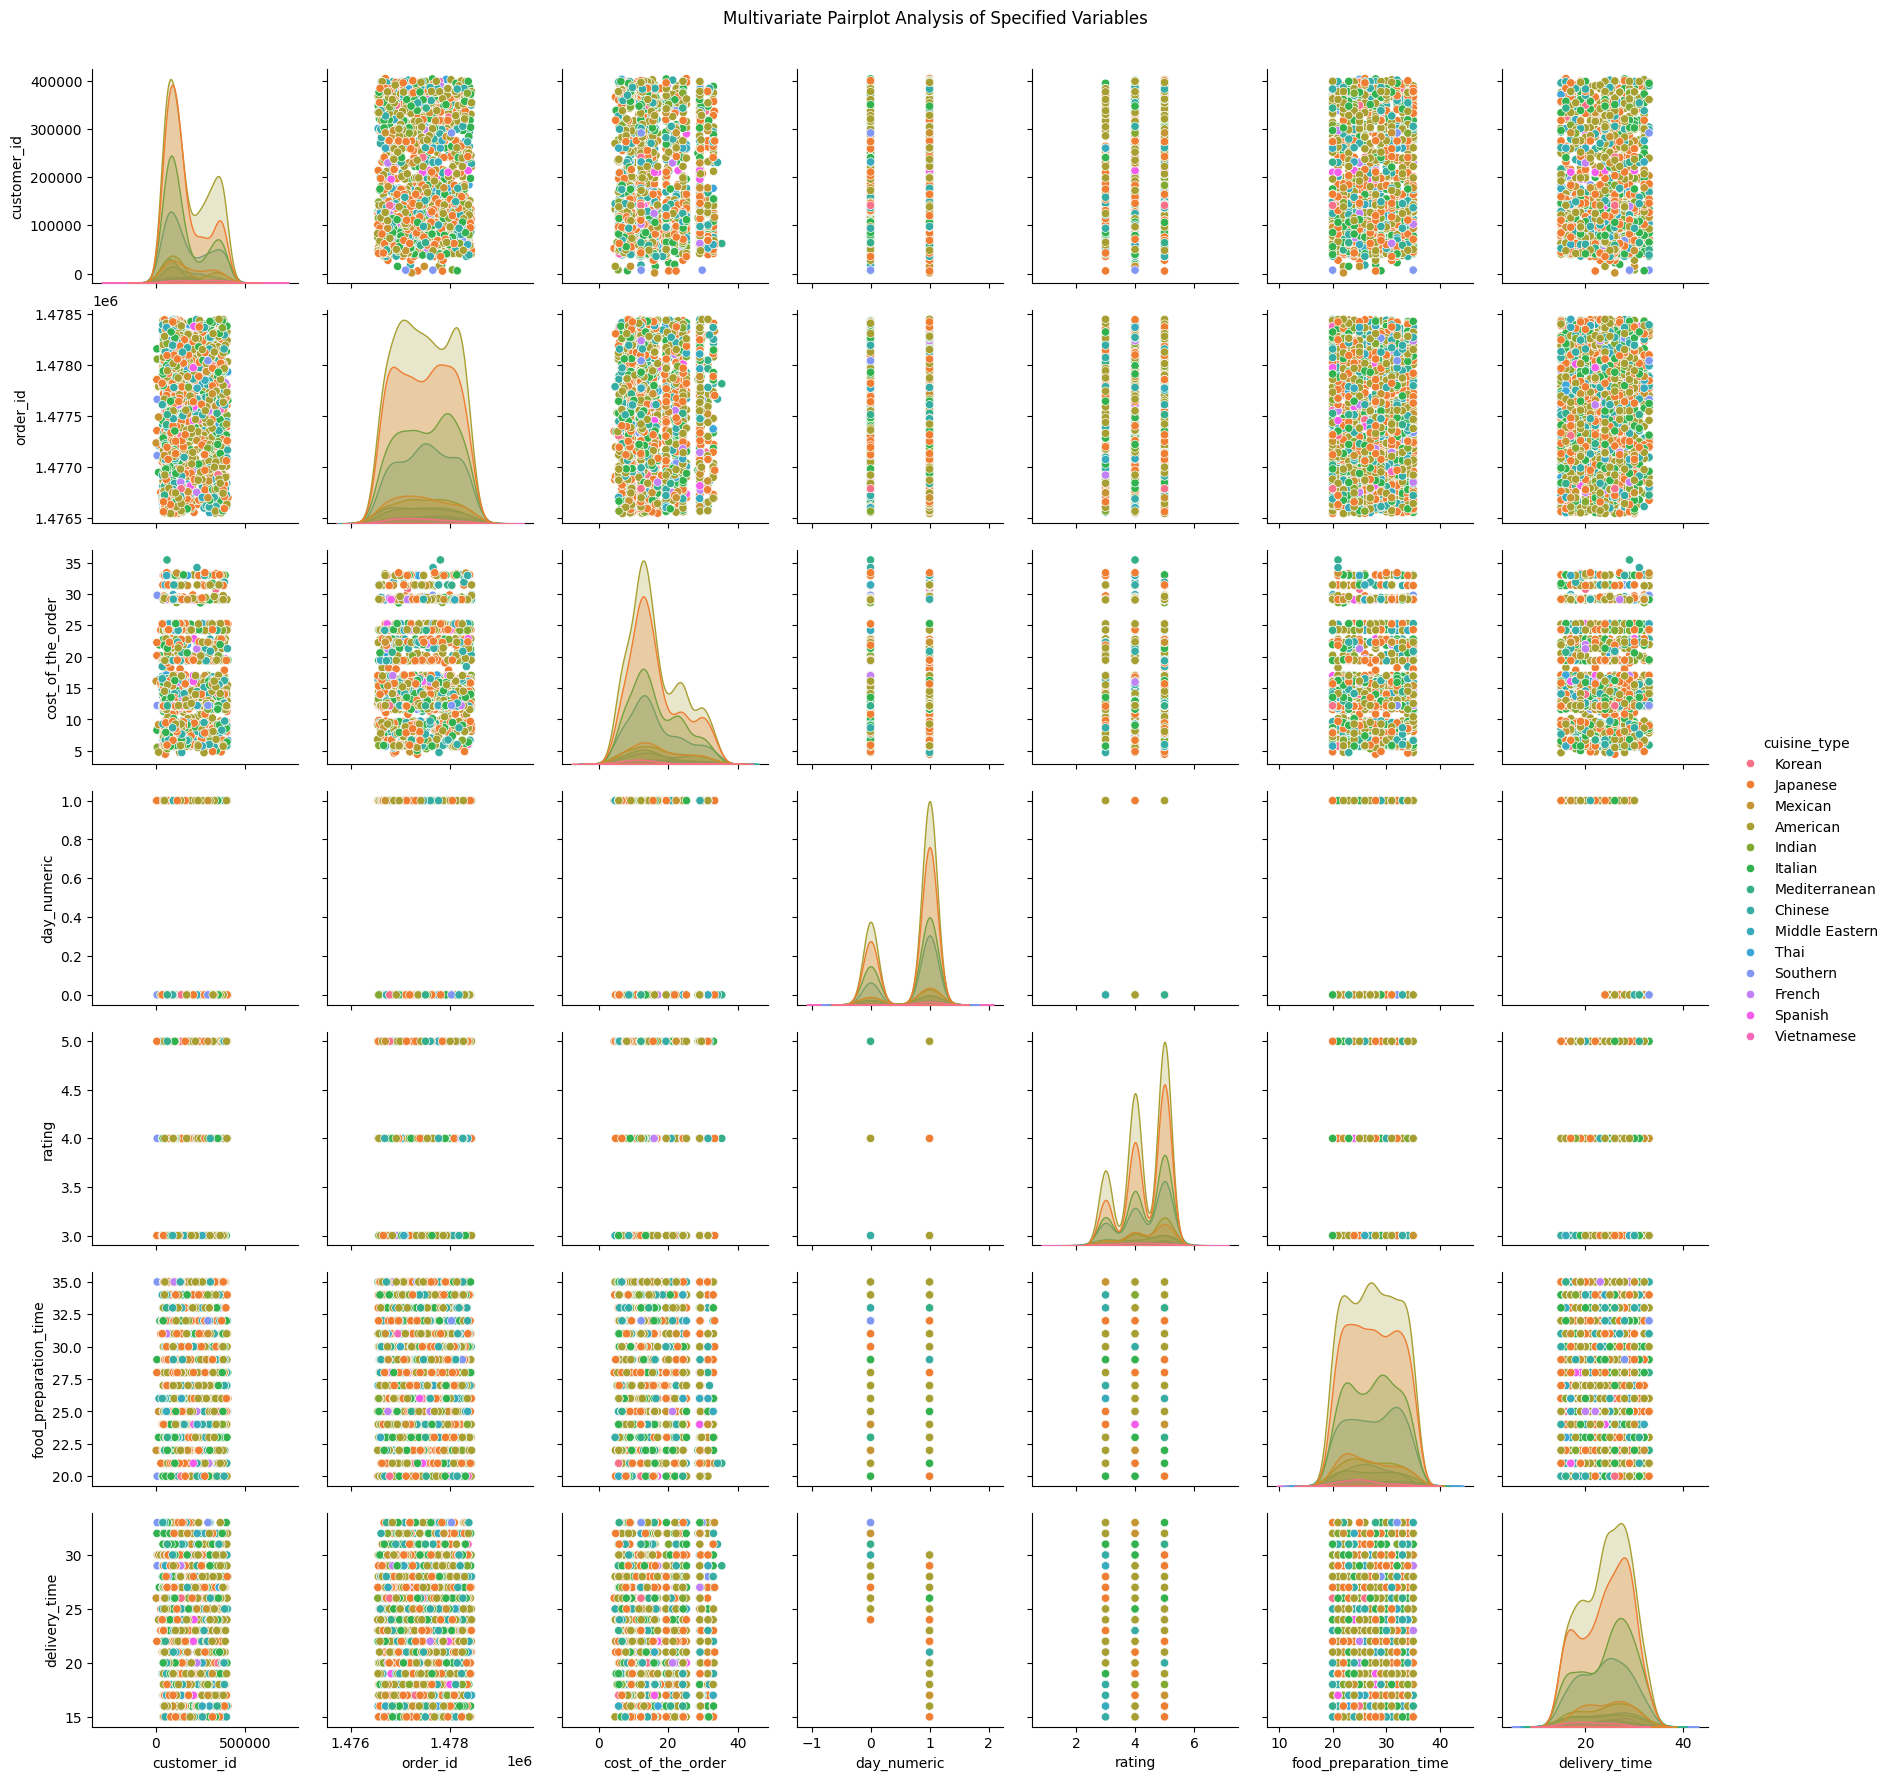

In [59]:
# Multivariate Pairplot analysis exploring relationships between specified variables by cuisine type
# 'customer_id', 'order_id', 'cost_of_the_order', 'day_numeric', 'rating', 'food_preparation_time', 'delivery_time', & 'cuisine_type'
# Create pairplot for multivariate analysis
sns.pairplot(Modified_df, vars=['customer_id', 'order_id', 'cost_of_the_order', 'day_numeric', 'rating', 'food_preparation_time', 'delivery_time'], hue='cuisine_type')
plt.suptitle('Multivariate Pairplot Analysis of Specified Variables', y=1.02)
plt.show()

Pairplot OBSERVATIONS:
*  Each scatter plot shows the relationship between two variables, while the diagonal plots show the distribution of individual variables.
* Order_id and customer_id are unique identifiers, no significant clustering, as expected, they are not intended to correlate with other factors.
* Higher costs are slightly associated with higher ratings and longer delivery times.
* There is a noticeable spread in costs across weekdays and weekends.
* Delivery times and food preparation times vary across different days, with some days showing longer times.
* Higher ratings are generally associated with higher costs and longer food preparation times.
* There is no strong correlation between ratings and delivery times.
* Longer food preparation times are associated with longer delivery times.

**INSIGHT:**
* **Some scatter plots reveal outliers, particularly in cost_of_the_order and delivery_time, which could be worth investigating further.**
* **The histograms on the diagonal show the distribution of each variable. For example, rating appears to have a left-skewed distribution, indicating that most ratings are high.**

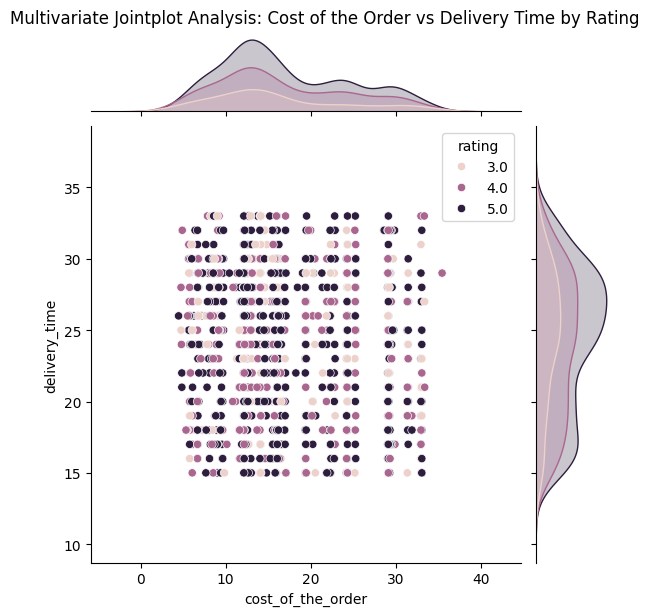

In [60]:
# Multivariate Jointplot analysis between specified variables (cost of the order & delivery time, by rating)
# Multivariate Jointplot analysis between specified variables (cost of the order & delivery time, by rating)
# Create jointplot

sns.jointplot(data=Modified_df, x='cost_of_the_order', y='delivery_time', kind='scatter', hue='rating');
plt.suptitle('Multivariate Jointplot Analysis: Cost of the Order vs Delivery Time by Rating', y=1.02)
plt.show()

OBSERVATIONS:
* Most orders are clustered in the lower cost range, indicating that the majority of orders are relatively inexpensive.
* The density plot shows a peak around lower costs.

* Delivery times are mostly clustered around a specific range, suggesting a common delivery duration for most orders.
* The density plot shows a peak around the middle range of delivery times.

* Higher-rated orders (rating 5.0) are spread across various costs and delivery times, indicating no strong correlation between high ratings and either lower costs or faster delivery times.

**INSIGHT:**
* **To maintain higher ratings, focus on strategies to sustain high ratings for lower cost, quick deliveries.**
* **Gather more data on higher cost orders to better understand customer satisfaction.**
* **Examine factors causing longer delivery times for high cost orders.**

In [61]:
# Bivariate analysis between food preparation time and total delivery time
# Calculate total delivery time
Modified_df['total_delivery_time'] = Modified_df['delivery_time'] + Modified_df['food_preparation_time']

print(Modified_df[['delivery_time', 'food_preparation_time', 'total_delivery_time']])

      delivery_time  food_preparation_time  total_delivery_time
0                20                     25                   45
1                23                     25                   48
2                28                     23                   51
3                15                     25                   40
4                24                     25                   49
...             ...                    ...                  ...
1893             17                     31                   48
1894             19                     31                   50
1895             24                     31                   55
1896             31                     23                   54
1897             24                     28                   52

[1898 rows x 3 columns]


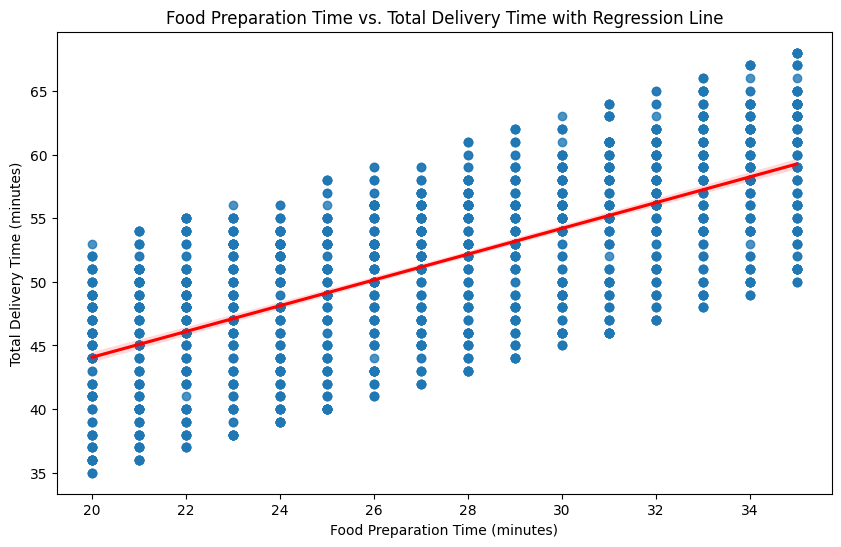

In [62]:
# Create Scatter plot with a regression line, food preparation time by total delivery time
plt.figure(figsize=(10, 6));
sns.regplot(x='food_preparation_time', y='total_delivery_time', data=Modified_df, line_kws={"color": "red"})

plt.title('Food Preparation Time vs. Total Delivery Time with Regression Line')
plt.xlabel('Food Preparation Time (minutes)')
plt.ylabel('Total Delivery Time (minutes)')

plt.show()

OBSERVATIONS:
* The red regression line indicates a positive correlation between food preparation time and total delivery time.
* The positive correlation suggests that reducing food preparation time could help decrease total delivery time.
* The data points are spread out, suggesting variability in total delivery times even for similar food preparation times.
* Food preparation times range from 20 to 34 minutes, while total delivery times range from 35 to 65 minutes.

**INSIGHTS:**
* **As food preparation time increases, the total delivery time also tends to increase.**
* **Identifying and addressing bottlenecks in the preparation process could improve overall delivery efficiency.**
* **Variability in total delivery times could suggest there are other factors influencing delivery time, such as traffic conditions or delivery distance.**
* **The food preparation range shows that even with shorter preparation times, the total delivery time can still be relatively long. This suggest that simply adding more delivery drivers may not significantly reduce delivery times, as the preparation time also plays a crucial role.**

In [63]:
# Correlation matrix and heatmap of specified variables,
# 'customer_id', 'order_id', 'cost_of_the_order','delivery_time', 'day_numeric', 'rating', 'food_preparation_time', 'total_delivery_time', 'cuisine_type_num', & 'restaurant_name_num'

# Convert 'cuisine_type' & 'restuarant_name'to numerical using pd.factorize. This assigns a unique integer to each
Modified_df['cuisine_type_num'] = pd.factorize(Modified_df['cuisine_type'])[0]
Modified_df['restaurant_name_num'] = pd.factorize(Modified_df['restaurant_name'])[0]

# Verify the change
print(Modified_df['cuisine_type_num'].dtype)
print(Modified_df['restaurant_name_num'].dtype)

int64
int64


                       customer_id  order_id  cost_of_the_order  \
customer_id               1.000000 -0.013960          -0.001322   
order_id                 -0.013960  1.000000           0.021171   
cost_of_the_order        -0.001322  0.021171           1.000000   
delivery_time            -0.009885  0.009690          -0.029949   
day_numeric              -0.010313  0.013971           0.015960   
rating                    0.007753  0.006308           0.033983   
food_preparation_time    -0.030330 -0.007026           0.041527   
total_delivery_time      -0.027754  0.002288           0.006358   
cuisine_type_num          0.000049  0.018257           0.046031   
restaurant_name_num       0.020382 -0.028677           0.002722   

                       delivery_time  day_numeric    rating  \
customer_id                -0.009885    -0.010313  0.007753   
order_id                    0.009690     0.013971  0.006308   
cost_of_the_order          -0.029949     0.015960  0.033983   
delivery_t

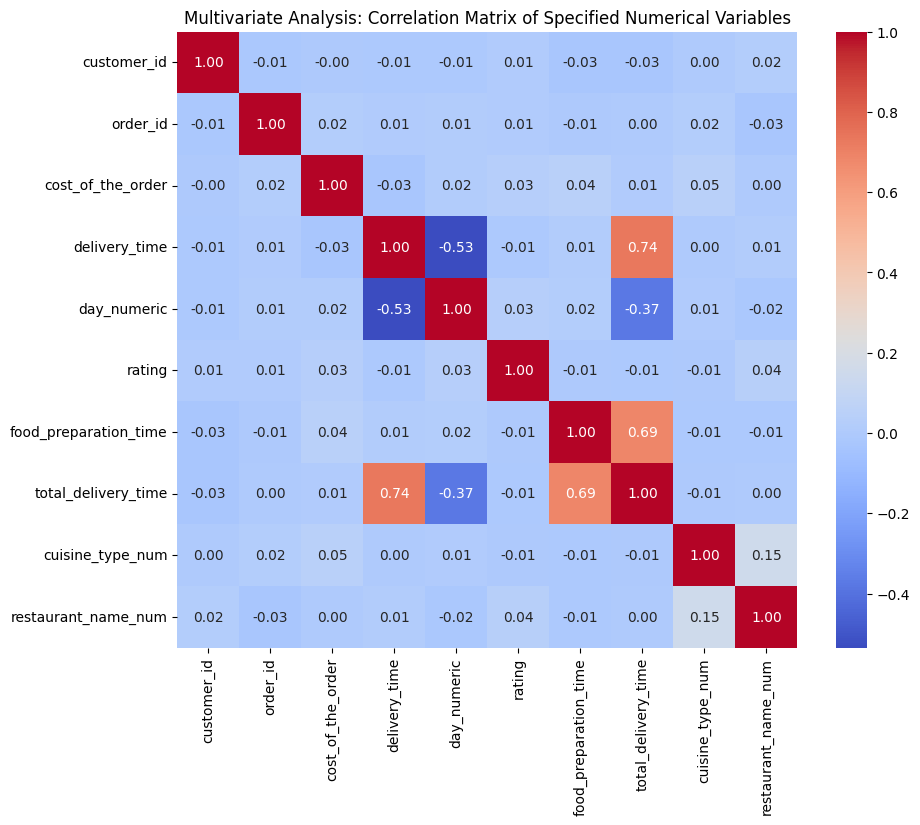

In [64]:
# Select the numerical variables, calculate/print and plot the correlation matrix
numerical_columns = ['customer_id', 'order_id', 'cost_of_the_order','delivery_time', 'day_numeric', 'rating', 'food_preparation_time', 'total_delivery_time', 'cuisine_type_num', 'restaurant_name_num']

# Calculate/print correlation matrix
correlation_matrix = Modified_df[numerical_columns].corr()
print(correlation_matrix)

# Plot
plt.figure(figsize=(10, 8));
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Multivariate Analysis: Correlation Matrix of Specified Numerical Variables')
plt.show()

OBSERVATIONS:
* The correlation values between customer_id (also, Order id) and other variables are very close to zero, indicating that they are not linearly correlated with any other variable. This is expected because they are both unique identifiers.
* The cost_of_the_order has low positive correlations across the board. It shows the highest correlation of 0.04 with food_preparation_time, suggesting a very weak positive relationship.
* There is a strong negative correlation (-0.53) between delivery_time and day_numeric. This suggests that as the numeric representation of the day increases, the delivery time tends to decrease, or vice versa.
* Total_delivery_time and delivery_time shows a strong positive correlation(0.74), indicating that as the total delivery time increases, the delivery time also increases significantly.
* The correlation between rating and other variables is very low, with a maximum value of 0.07 with restaurant_name_num. This suggests that rating is influenced by factors not included in this matrix or possibly a subjective measure.
* Food_preparation_time has a weak positive correlation (0.04) with cost_of_the_order, implying a slight increase in cost with more preparation time.
* Food_preparation_time and total_delivery_time has a strong positive correlation (0.69), suggests that longer food preparation times contribute to longer total delivery times.
* Cuisine_type_num shows a moderate positive correlation (0.26) with restaurant_name_num, indicating that certain cuisine types might be associated with particular restaurants.

**INSIGHT:**
* **Overall, the matrix suggests weak to negligible correlation among most of the variables, with the significant outlier being the negative correlation between delivery_time and day_numeric. This highlight which areas may require closer scrutiny or additional data to understand relationships better.**

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [65]:
# Calculate the rating count & average rating for each restuarant
restuarant_rating = Modified_df.groupby('restaurant_name').agg({'rating': ['count', 'mean']}).reset_index()

# Rename columns
restuarant_rating.columns = ['restaurant_name', 'rating_count', 'rating_avg']

# Filter for restuarants fulfilling the criteria
eligible_restuarants = restuarant_rating[(restuarant_rating['rating_count'] > 50) & (restuarant_rating['rating_avg'] > 4)]

print('OBSERVATIONS:')
print('* The restaurants fulfilling the criteria to get the promotional offer are:')
print(eligible_restuarants)

OBSERVATIONS:
* The restaurants fulfilling the criteria to get the promotional offer are:
               restaurant_name  rating_count  rating_avg
20   Blue Ribbon Fried Chicken            64    4.328125
21           Blue Ribbon Sushi            73    4.219178
136                Shake Shack           133    4.278195
153          The Meatball Shop            84    4.511905


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [66]:
# Calculate total revenue
calculate_total_revenue = "${:.2f}".format(Modified_df['cost_of_the_order'].sum())
print(calculate_total_revenue)

$31314.82


In [67]:
# Calculate commission based on cost_of_the_order
def calculate_commission(cost):
    if cost > 20:
        return cost * 0.25
    elif cost > 5:
        return cost * 0.15
    else:
        return 0

# Applying the commission calulation to each order
Modified_df['commission'] = Modified_df['cost_of_the_order'].apply(calculate_commission)


In [68]:
calculate_commission = "${:.2f}".format(Modified_df['commission'].sum())
print (calculate_commission)

$6166.30


In [69]:
# Calculate the total net revenue
net_revenue = Modified_df['cost_of_the_order'].sum() + Modified_df['commission'].sum()
print (f'Total Net Revenue: ${net_revenue:.2f}')


Total Net Revenue: $37481.12


In [70]:
print('**The the net revenue generated by the company across all orders is $6166.30** ')

**The the net revenue generated by the company across all orders is $6166.30** 


OBSERVATIONS:
* The Net revenue is \$37481.12
* The total revenue is \$31314.82 & The Commission/Net Revenue generated on all orders is \$6616.30**

**INSIGHT:**
* **FoodHub could earn an extra \$6166.30 by imposing commission rates.**

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [71]:
# Total delivery time calculation
Modified_df['total_delivery_time'] = Modified_df['food_preparation_time'] + Modified_df['delivery_time']

# Using total time, filter for orders that have greater than 60 minutes to deliver and calculate filtered percentage
Modified_df_filtered = Modified_df[Modified_df['total_delivery_time'] > 60]

total_orders = len(Modified_df)
print(f'Total number of orders: {total_orders}')

Modified_df_orders = len(Modified_df_filtered)

print(f'Total number of orders taking more than 60 minutes to deliver are: {Modified_df_orders} orders')

# Calculate percentage of orders taking more than 60 minutes
percentage_filtered = (Modified_df_orders / total_orders) * 100
print('OBSERVATIONS:')

print(f"* Percentage of orders taking more than 60 minutes to deliver is: {percentage_filtered: .2f}%")

Total number of orders: 1898
Total number of orders taking more than 60 minutes to deliver are: 200 orders
OBSERVATIONS:
* Percentage of orders taking more than 60 minutes to deliver is:  10.54%


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [72]:
# REMINDER: numerical representation calculation of day of the week (weekday/weekend) earlier mapped in this notebook.
mean_delivery_time = Modified_df.groupby('day_of_the_week')['delivery_time'].mean().reset_index()

print(mean_delivery_time)

  day_of_the_week  delivery_time
0         Weekday      28.340037
1         Weekend      22.470022


In [73]:
print('OBSERVATIONS:')
print(' 28.34 - 22.47 = 5.87 minutes')
print('* The mean delivery time varies during weekdays and weekends by 5.87 minutes.')
print('* Delivery time is longer during weekdays and much faster on weekends.')

OBSERVATIONS:
 28.34 - 22.47 = 5.87 minutes
* The mean delivery time varies during weekdays and weekends by 5.87 minutes.
* Delivery time is longer during weekdays and much faster on weekends.


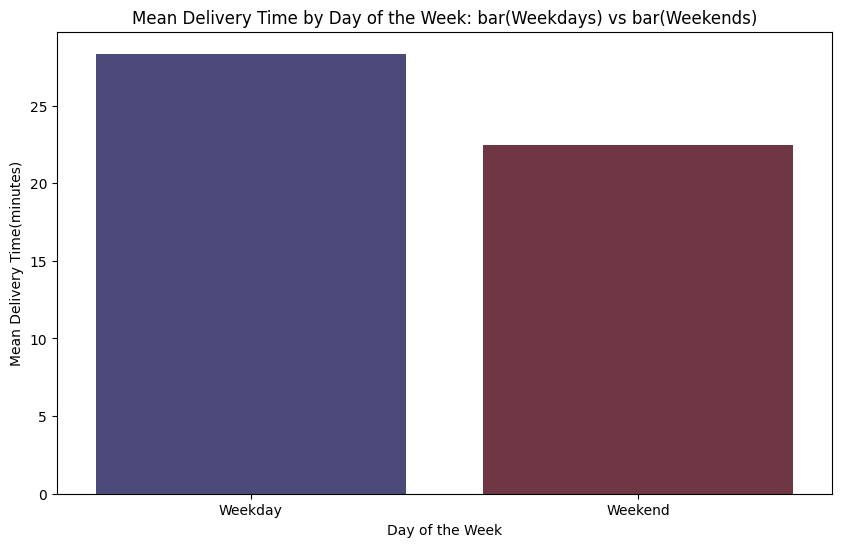

In [74]:
# Distribution analysis for mean delivery time of orders between weekdays and weekends
# Create Barplot
plt.figure(figsize=(10, 6));

sns.barplot(x='day_of_the_week', y='delivery_time', hue= 'day_of_the_week', data=mean_delivery_time, palette='icefire', legend=False)
plt.xlabel('Day of the Week')
plt.ylabel('Mean Delivery Time(minutes)')
plt.title('Mean Delivery Time by Day of the Week: bar(Weekdays) vs bar(Weekends)')

plt.show()

OBSERVATIONS:
* Bar 'weekdays' is taller than Bar 'weekends', indicating longer delivery times on weekdays.

**INSIGHT:**
* **Its suggested that deliveries are faster on weekends versus weekdays, this can be useful for optimizing delivery schedules and improving customer satisfaction, thus possibly encourging 'not given' rating customers a reason to rate, and also possibly higher ratings overall.**

#### Data Analysis to help FoodHub to find answers to improve the business, is completed.
##### rechecking dataframe for its integrity ....

In [75]:
 # View the columns in the copied dataset
Modified_df.columns

Index(['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
       'cost_of_the_order', 'day_of_the_week', 'rating',
       'food_preparation_time', 'delivery_time', 'day_numeric',
       'total_delivery_time', 'cuisine_type_num', 'restaurant_name_num',
       'commission'],
      dtype='object')

In [76]:
# View the first 5 rows in the copied dataset, with added columns
Modified_df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,day_numeric,total_delivery_time,cuisine_type_num,restaurant_name_num,commission
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20,1,45,0,0,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23,1,48,1,1,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28,0,51,2,2,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15,1,40,3,3,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24,0,49,3,4,1.7385


In [77]:
# View the number of rows & columns in the Modified dataframe
Modified_df.shape

(1898, 14)

In [78]:
print('OBSERVATIONS:')
print('Modified dataframe has 1898 rows & 14 columns. Additional columns added in the course of investigations.')

OBSERVATIONS:
Modified dataframe has 1898 rows & 14 columns. Additional columns added in the course of investigations.


In [79]:
# Recap, view the columns of the original dataset
Original_df.columns

Index(['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
       'cost_of_the_order', 'day_of_the_week', 'rating',
       'food_preparation_time', 'delivery_time'],
      dtype='object')

In [80]:
# Recap, view the first 5 rows of the original dataset
Original_df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [81]:
# Recap, cross check integrity of Original dataframe, view the number of rows & columns
Original_df.shape

(1898, 9)

In [82]:
print('OBSERVATIONS:')
print('Original dataframe has 1898 rows & 9 columns. Integrity intact.')

OBSERVATIONS:
Original dataframe has 1898 rows & 9 columns. Integrity intact.


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### **Conclusion:**

#### In conclusion,

* The dataset loaded properly.
* There are 9 columns in the dataset, this corresponds with the data dictionary provided.
* The dataframe tagged 'Original_df', has 1898 rows & 9 columns.
* The datatypes are all consistent to the variables assigned - order_id, customer_id, cost_of_the_order, food_preparation_time, & delivery_time, columns, are numerical in nature, while the rating is object. However, restuarant_name, cuisine_type & day_of_the_week are object types but they can also be represented as either categorical.
* All of the columns have 1898 observations, which means none of the columns has null values. There appears to be no missing values in the dataset, indicative by "non-null" through out the columns.
* Once an order is placed, the food preparation time takes minimum 20 minutes, on average it takes approximately 27.37 minutes, and the maximun 35 minutes.
* It takes delivery 15 to 33 minutes, averaging 24.16 minutes (standard deviation of 4.97 minutes).
* An average order cost approximately \$16.50, ranging from \$4.47 to \$35.41 (standard deviation of \$7.48).
* Order_id & customer_id, are unique identifiers. There are 1200 unique customers & 1891 unique orders in the dataset.
* From 1898 orders, 736 are 'Not rated', meaning 736 customers gave no ratings.
* Post all investigative analysis, a copy of the dataframe, tagged 'Modified_df', has 1898 rows and 14 columns, showcasing additional columns added in the course of the overall analysis. And the original dataframe, tagged 'Original_df', has 1898 rows and 9 columns, maintaining its integrity.





#### Exploratory Data Analysis suggests that:

**Customer id:**
* Customer id analysis observed that it is fairly evenly distributed, suggesting a diverse customer base. While the KDE curve reveals some clusters of customer activity, the median and interquartile range indicate low variability overall and the absence of outliers further supports a diverse customer base.
* There are 1200 unique customers in the dataset. Further analysis shows that
 very few customers made more that 5 orders.
* The number of customers decreases sharply as the number of orders increases.

**Order id:**
* Order id shows a generally even distribution, suggesting a consistent flow of orders.
* There is a concentration around a specific ID range, the median, interquartile range, and lack of outliers indicate overall low variability.
* There is a high frequency of single orders. Total number of customers who made only 1 order are: 784, who made more than 1 order are: 416, who made repeated orders are: 146

**Cost of the order:**
* Cost distribution analysis shows it is right-skewed, with longer tails extending towards higher costs, and shows a peak around a specific value, indicating a common price range for most orders.
* The KDE curve emphasizes this skewness, with a long tail towards higher costs, indicating fewer high-cost orders.
The highest frequency of orders falls within the \$10 to \$15 range, with smaller peaks around \$5 to \$10 and \$20 to \$25.
* The boxplot reveals several high-value outliers, indicating some orders are significantly more expensive than the majority.
* The median cost is around \$20, and the IQR shows moderate variability with positive skewness.
* The percentage of orders costing more than \$20 is, 29.24% .

**Food preparation time:**
* Food preparation times distribution analysis exhibits a noticeable peak, indicating a typical duration for most orders.
* The KDE curve reinforces this, showing a single peak that suggests consistent preparation times.
* The distribution is relatively tight with a few outliers, indicating that most orders are prepared within a consistent timeframe, though some take longer.
* The median preparation time is around 10-15 minutes.
* The IQR shows moderate variability.
* In the correlation matrix of numerical variables, it is observed that food preparation time and total delivery time has a strong positive correlation (0.69), suggesting that longer food preparation times contribute to longer total delay times.
* Food preparation time and total delivery time scatterplot with a regression line analysis shows that there is a positive correlation between food preparation time and total delivery time, which suggests that reducing food preparation time could help decrease total delivery time. Spread out data points suggest variability in total delivery times even for similar food preparation times.
* Food preparation times range from 20 to 34 minutes.

**Delivery time:**
* Delivery times vary, with a peak indicating the most common duration.
* The KDE curve highlights this skewness, showing a long tail towards longer delivery times, which suggests occasional delays.
* The distribution analysis is relatively tight with some outliers, indicating that most deliveries are timely, though some experience delays.
* The median delivery time is 24.16 minutes. While total delivery time range from 35 to 65 minutes.
* The IQR indicates moderate variability.

**Restuarant name:**
* There are 178 unique restaurants in the dataset.
* The unique restuarant distribution analysis shows a wide range of restaurant names with varying frequencies. Some names appear more frequently than others, indicating popular restaurants.
* Top 5 restuarants in terms of the number of orders received are Shake Shack, 219; The Meatball Shop, 132; Blue Ribbon Sushi, 119; Blue Ribbon Fried Chicken, 96; and Parm, 68.
* The correlation matrix of numerical variables, observed that cuisine type shows a moderate positive correlation (0.26) with restuarant name, indicating that certain cuisine type might be associated with particular restuarants.

**Cuisine type**
* There are 14 unique cuisine types in the dataset.
* Correlation analysis for unique customer and unique order count by cuisine type shows there is a positive correlation between unique customer count and unique order count across different cuisine types.
* American (584), Japanese (470) Italian (298), and Chinese (215) cuisines have higher counts, indicating their popularity.
* Cuisines like Mediterranean, mid sort after and French, less common, have lower counts, suggesting niche markets.
* An analysis cost of order by cuisine type shows cost of orders varies across different cuisine types, from Vietnamese \$12.88 to French \$19.79; French, Southern and Spanish cuisines have higher average costs, above \$18; Vietnamese, Korean and Mediterranean cuisines have lower average order costs, below $16.   
* The distibution analysis for average cost by cuisine type shows French cuisine has the highest average order cost, almost \$20. Mid-range costs cuisines are American, Chinese & Italian.
Vietnamese has the lowest average cost, \$12.
* Average food preparation time by cuisine distribution analysis shows the shortest average food preparation time, Korean cuisine at 25.46 minutes. Longest average food preparation time, Southern cuisine at 27.59 minutes.
* The average food preparation time for all cuisines is relatively close, 25.46 to 27.59 minutes.

**Day of the week:**
* Day of the Week distibution analysis shows there is a significant difference in frequencies between weekday and weekend.
* Percentage of Day of the Week orders: Weekend 71.2% and Weekdays 28.8%
* In the correlation matrix of numerical variables, it is observed that there is a strong negative correlation (-0.53) between delivery time and day of the week, this suggest that as day of the week representation increases, the delivery time tends to decrease, and vice versa.
* It is observed in the distribution analysis for mean delivery time for 'day of the week' there are longer delivery times on weekdays.

**Rating:**
* Rating distribution analysis shows a range from 1 to 5, with a significant number, 38.8% of ‘Not given’ ratings.
* The highest frequency of ratings recieved is '5' with order count 588; '4' with order count 386; '3' with order count 188.
* The total mean average rating for all cuisine types ranges from 4.0 to 4.8.  * Distribution analysis of ratings by cuisine type shows that:
  * Korean and Japanese cuisines have a narrow distribution around higher ratings, indicating consistent customer satisfaction.
  * American has a wider distribution with a slight skew towards lower ratings, suggesting varied customer experiences.
  * Italian and Spanish have a slight skew towards higher ratings but with some spread, indicating generally positive feedback with some variability.
  * Mediterranean and Mexican have a broad distribution with multiple peaks, suggesting mixed customer experiences.
  * French has a narrow peak around higher ratings, indicating high satisfaction but fewer lower ratings.
  * Middle Eastern has an almost uniform distribution across all rating levels, indicating diverse customer opinions.
  * Thai and Vietnamese have a wide base with concentrations at both ends, indicating polarized opinions.
  * Chinese has two peaks, suggesting distinct groups of customer satisfaction levels.
  * Southern has an elongated shape with most data points in the middle range, indicating average satisfaction.





#### Scenario Conclusion Observations:

   * Should FoodHub decide to give 20% discount vouchers to the top 3 most frequent customers. The IDs of these customers and the number of orders they placed are:
    * customer_id 52832 with 13 orders;
    * customer_id 47440 with 10 orders;
    * customer_id 83287 with 9 orders.

   * Should FoodHub decide to give a promotional offer in the advertisement of the restaurants, the restaurants fulfilling the criteria (a rating count of more than 50 and the average rating should be greater than 4) to get the promotional offer are:
    * Blue Ribbon Fried Chicken, rating count 64 & average rating 4.33;
    * Blue Ribbon Sushi, rating count 73 & average rating 4.22;
    * Shake Shack, rating count 133 & average rating 4.28;
    * The Meatball Shop, rating count 84 & average rating 4.51

   * Should FoodHub decide to charge the restaurant 25% on the orders having cost greater than \$20 and 15% on the orders having cost greater than \$5. The the net revenue generated by the company across all orders is: \$6166.30

   * Should FoodHub decide to analyze the total time required to deliver the food, the percentage of orders taking more than 60 minutes to get delivered from the time the order is placed (The food is prepared and then delivered.) is:  10.54%

   * Should FoodHub decide to analyze the delivery time of the orders on weekdays and weekends, the mean delivery time varies during weekdays and weekends by: 5.87 minutes. Delivery is much faster on weekends.

### **Recommendations:**

#### Overall suggestions -

* The postive skewed trend between customer id and order id indicates that although there is substantial customer base, there are also opportunities to boost growth by promoting repeat orders.
* Implement loyalty programs/special offers to encourage repeat orders from existing customers.
* The average cost of orders varies across different cuisine types, this is very useful for analyzing pricing strategies and consumer spending habits, therefore focus on popular price range,  \$10 to \$15 range, and use the data created on targeted marketing campaigns for different price ranges to maximise sales.
* Optimize high cost orders by examining them to determine if they represent bulk purchases or premium products and consider targeted marketing for these segments.
* Also, gather more data on higher cost orders to better understand customer satisfaction.
* Promoting lower-cost cuisines could attract cost-sensitive customers.
* Offer promotions/discounts on mid-range cost cuisines to boost sales and attract a broader customer base.
* Conduct further analysis to understand customer preferences and spending patterns for different cuisines, this can also inform targeted marketing campaigns and promotions.
* For cuisines with longer preparation times, like Southern, they should consider investing in training and efficient cooking techniques to reduce preparation time without compromising quality.
* Cusines with low variability suggest a more uniform perception among raters, which could imply a more standardized experience or personal preferences. Therefore, maintaining consistency in quality and experience could be the key to sustaining customer satisfaction.
* Cuisines with high variability might indicate diverse opinions among raters, possibly due to their locations differences in preparation or personal preferences. Therefore, further investigation into the factors contributing to this spread could be beneficial, such as examining specific dishes, restuarant quality, location.
* For restuarants aiming to improve service speed, focusing on cuisines with shorter preparation times like Korean, could be beneficial.
* Since food_preparation_time and delivery_time do not significantly affect each other, focus on optimizing each process independently, to improve overall efficiency.
* Explore other factors that might influence delivery time, such as traffic conditions, distance, or order volume, to identify areas for improvement.
* Investing in additional delivery drivers may not be a significant impact, as analyis suggest there is a non-linear relationship between food preparation time and delivery time.
* Its suggested that deliveries are faster on weekends versus weekdays, this can be useful for optimizing delivery schedules and improving customer satisfaction, thus possibly encourging 'not given' rating customers a reason to rate, and also possibly higher ratings overall.*
* To maintain higher ratings, focus on strategies to sustain high ratings for lower cost, quick deliveries.*




**In summary, based on cuisine type and feedback ratings, recommendations for Foodhub include the following suggestions:**

* Researching if there would there be any cuisine seasonal or regional preferences, thus adjusting the menu and promotions for them.

* Consider optimizing the menu by including more of the high rated cuisines and reducing / modifying the low rated ones, thus improving overall customer staisfaction, translating to better, higher and more ratings.

* Focus on promoting cuisines that receive high ratings utilizing marketing efforts. Showcasing them in special promotions / advertisments, thus attracting more customers.

* Improve on market research, such as surveys or customer feedback, to gain insight into why these cusine are getting lower ratings, use this to make improvements on the menu preparation methods, recipes & ingredients.

* Consider giving away 'certain-sized meals', buy one get one free, to motivate those unrated customers to rate.

* Create a structured process for collecting, analyzing, and responding to customer feedback, using this, can provide continous improvements in customer and menu synergy.


**Distribution ratings ranging from 1 to 5 for various cusine types, helps to understand customer satisfaction and preferences for the different cuisines, so therefore:**
* Seeing that approximately 38% of orders is 'not-rated', its recommended to seeks ways to improve customers response, hence reducing the rating 'not-given', thus a closer look at customer satisfaction to enable service improvements.
* For cuisines like Korean and Japanese, continue maintaining high standards and explore subtle innovations.
* For American cuisine, identify and address factors contributing to lower ratings.
* Targeted Improvements: For Mediterranean and Mexican cuisines, analyze specific dishes or aspects receiving varied feedback for targeted improvements.
* Expand Offerings: For French cuisine, maintain excellence while possibly expanding offerings to attract more customers.
* Understand Preferences: For Thai and Vietnamese cuisines, gather detailed preferences to analyze.

**Further business recommendations:**

* Explore the volume of restuarants diversity, as it suggests a competitive market with many players, which could be beneficial for customers seeking variety. Thus more inclination to give ratings by majority if not all, customers.
* Capitalize on higher activity levels during weekends by offering special promotions or discounts to attract more customers.
*  Optimizing delivery routes, particularly during weekdays, would be beneficial.
* Ensure that staff levels and resources are adequate to handle the increased demand on weekends to maintain high service standards.
* Implement strategies to streamline food preparation and delivery processes separately, such as better kitchen workflows and optimized delivery routes.

**By absorbing the above mentioned conclusions and implementing some, or all, of the recommendations suggested with targeted strategies of cuisine type and feedback ratings, FoodHub can improve customer satisfaction, streamline operations, and drive business growth.**